<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">EDA - Explorative Data Analysis - first iteration</div>
<br>
<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">Our EDA is divided into different sections. The first iteration consists of a general approach to the data. This is followed by a hypothesis-driven investigation.<br><br>
 In the second iteration, missing observations were found. This is an exciting finding, as we have not encountered this investigation result at any point in our handling of this data. It is precisely this finding, which allows acurate modeling within our project. </div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Import modules</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data </div><br>
Here the file of first iteration of data cleaning is read.


In [2]:
df = pd.read_pickle('../data/data_combined_clean.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;"> Creating columns for EDA </div><br>

In [3]:
# creating columns for month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# weekly total sale per store as new column
df['Weekly_Sales_Store'] = df.groupby(['Store', 'Calendar_Week'])['Weekly_Sales'].transform('sum')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;"> Let's have a look at the distribution of cases by year</div><br>

In [4]:
year_counts = df['Date'].dt.year.value_counts()
print(year_counts)

Date
2011    153453
2010    140679
2012    127438
Name: count, dtype: int64


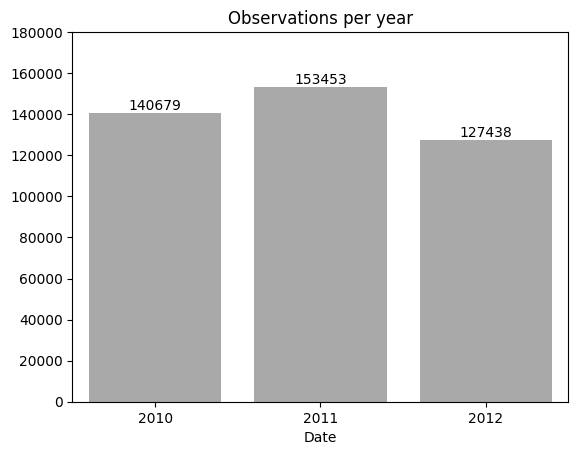

In [5]:
ax = sns.barplot(x=year_counts.index, y=year_counts.values, color='darkgrey')

ax.bar_label(ax.containers[0])
ax.set_title('Observations per year')
ax.set(ylim=(0,180000));

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;"> Observations per year in percent</div><br>

In [6]:
year_counts = df['Date'].dt.year.value_counts(normalize=True).round(2)
print(year_counts)

Date
2011    0.36
2010    0.33
2012    0.30
Name: proportion, dtype: float64


We have slightly more cases for 2011 (36 %) than for 2010 (33 %) and 2012 (30%).

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Have a closer look at weekly sales</div><br>
Let's see how the distribution of Weekly Sales looks like:

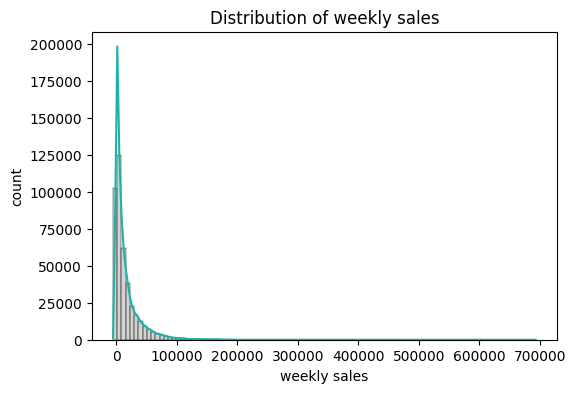

In [7]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(df.Weekly_Sales, color='darkgrey', kde = True, bins=100)

ax.lines[0].set_color('lightseagreen')
ax.set_title('Distribution of weekly sales')
ax.set_xlabel('weekly sales')
ax.set_ylabel('count');

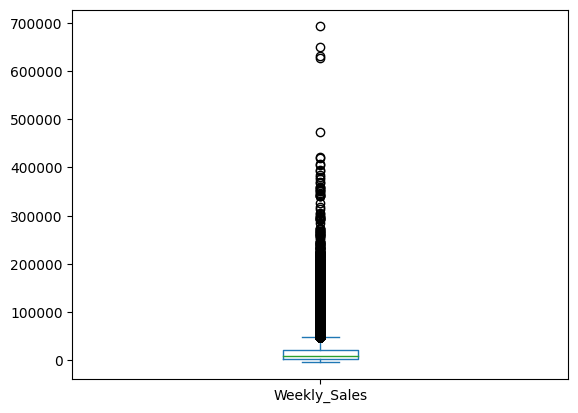

In [8]:
# looking for outliers with boxplot
df['Weekly_Sales'].plot(kind='box');

Most values of weekly_sales are between 0 and 80,000, but there are a lot of (extreme) outliers.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Descriptive statistics of weekly sales</div><br>

In [9]:
df['Weekly_Sales'].describe().round(2)

count    421570.00
mean      15981.26
std       22711.18
min       -4988.94
25%        2079.65
50%        7612.03
75%       20205.85
max      693099.36
Name: Weekly_Sales, dtype: float64

The mean value of weekly sales is $16,105.31. The median is only $7772.21. <br>
This means that the distribution of values is positively skewed. A much smaller median compared to the mean indicates that the data set has a skewed distribution with a long right tail, suggesting the presence of outliers and/or extremely high values.

50 % of the weekly sales is between $2146.02 and $20.356,66. <br>
Minimum is $-4988.94 and the maximum is $693.099,36. The standard deviation is huge with $22961.30. The distribution of values is positively skewed.

In [10]:
df.query('Weekly_Sales > 20206').count().Weekly_Sales

105392

In 105392 cases weekly sales are outliers and are above the third quartile with 20206.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Total sales across all years</div><br>

In [11]:
# seperate dataframe for total sale per calendar week on storelevel
df1 = df.groupby(['Store', 'Calendar_Week'])['Weekly_Sales'].sum().reset_index()

# Renaming Weekly_sales to total_sales
df1 = df1.rename(columns={'Weekly_Sales': 'Weekly_Sales_Store'})

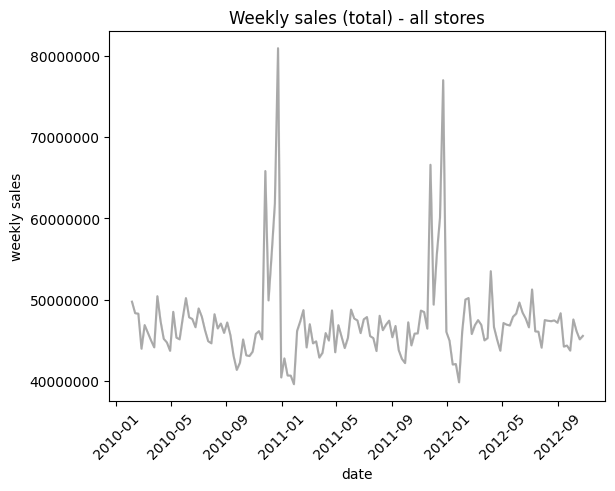

In [12]:
# plotting weekly sales on store level - all stores together
sns.lineplot(x = df['Date'], y = df.groupby(['Date'])['Weekly_Sales'].transform('sum'), color='darkgrey')

plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45, fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Weekly sales (total) - all stores');

In 2010 and 2011 there are seasonal peaks with significantly higher sales probably at thanksgiving week and christmas week as well. Data for 2012 ends with October.<br>
Next confirming that outlying values are placed at thanksgiving and christmas.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Temporal location of the outliers</div><br>

In [13]:
# dataferame with the top 20 weekly sales on department level
top_15_2010 = df[df['Year'] == 2010].nlargest(20, 'Weekly_Sales')
top_15_2011 = df[df['Year'] == 2011].nlargest(20, 'Weekly_Sales')

# concat dataframes
top_15_combined = pd.concat([top_15_2010, top_15_2011])

# printing dates with 30 highest sales
print('Dates with higest weekly sales:', [ x for x in top_15_combined.Date.unique().astype(str)])


Dates with higest weekly sales: ['2010-11-26', '2010-12-24', '2011-11-25', '2011-12-23']


As suggested, it is christmas and thanksgiving week, were the outliers are allocated with regards to time.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Stores</div><br>
Now let's see how many stores we have

In [14]:
print("total amount of stores: ", df.Store.nunique())


total amount of stores:  45


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Distribution of observations with regards to store</div><br>


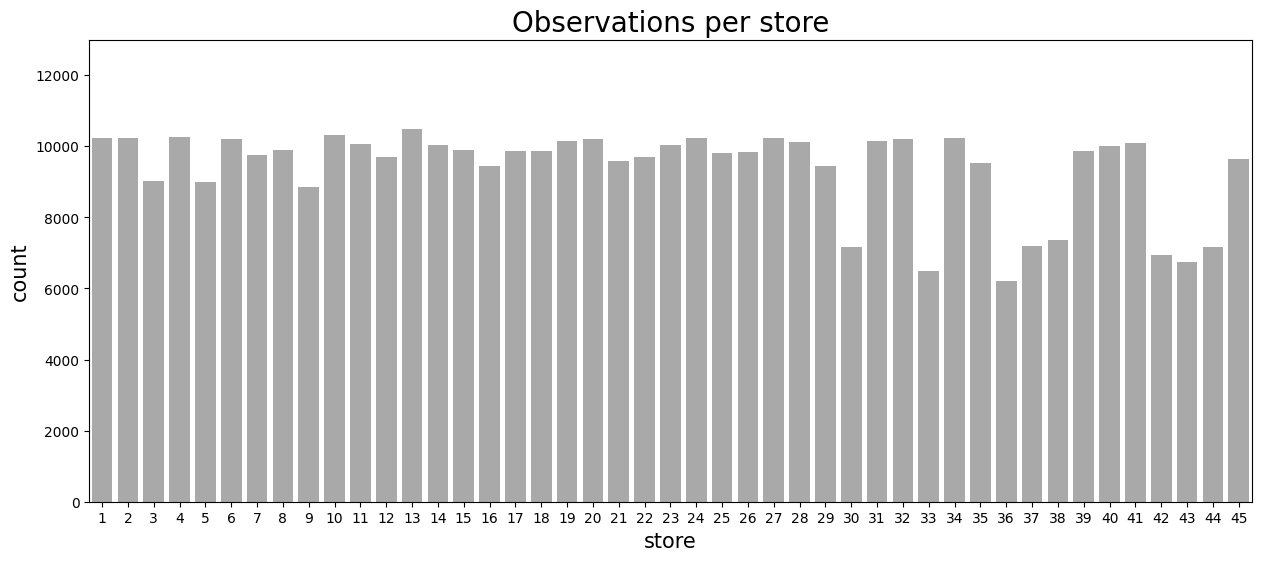

In [15]:
stores_count_values = df.Store.value_counts()

plt.figure(figsize=(15,6))

ax = sns.barplot(x=stores_count_values.index, y=stores_count_values.values, color='darkgrey')

ax.set_title('Observations per store', fontsize=20)
ax.set_ylim(0, 13000)
ax.set_ylabel('count', fontsize=15)
ax.set_xlabel('store', fontsize=15);

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Departments</div><br>
Now we count the values for the Departments:


In [16]:
print("total amount of Departments: ",df.Dept.nunique())
print("Department numbers: ", df.Dept.unique())

total amount of Departments:  81
Department numbers:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


Department numbers which are missing: 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89;<br>
All togehter 18 departments are missing.  <br>
The range of departments is from 1 until 99, we have 81 unique departments in our dataset.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Distribution of observations with regards to department</div><br>


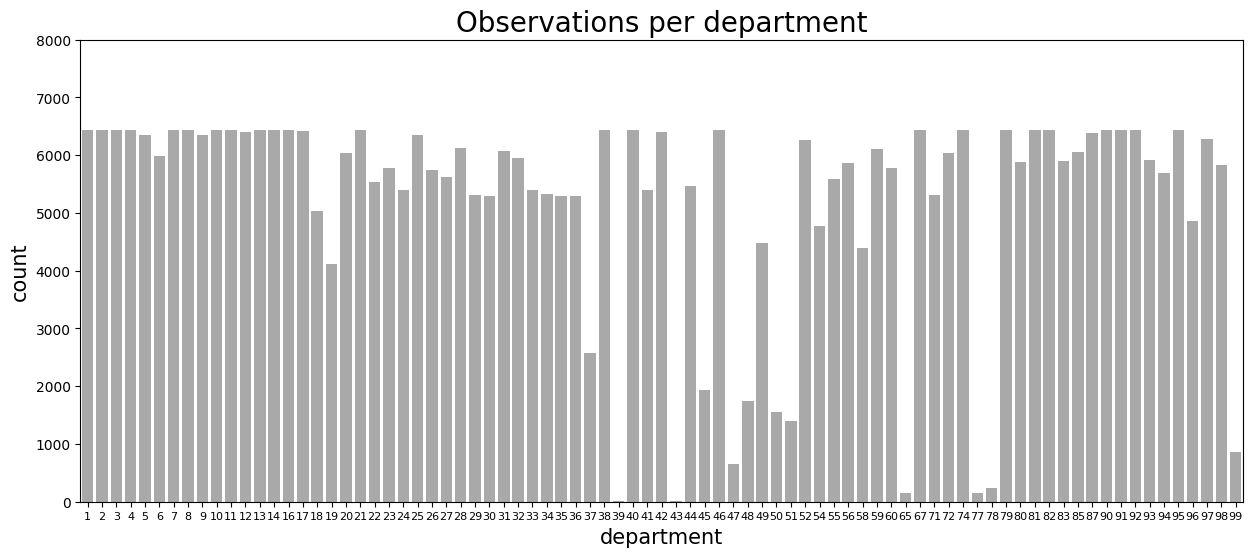

In [17]:
dept_count_values = df.Dept.value_counts()
plt.figure(figsize=(15,6))

ax = sns.barplot(x=dept_count_values.index, y=dept_count_values.values, color='darkgrey')

ax.set_title('Observations per department', fontsize=20)
ax.set_ylim(0, 8000)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_ylabel('count', fontsize=15)
ax.set_xlabel('department', fontsize=15);

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Weekly sale by store across time</div><br>


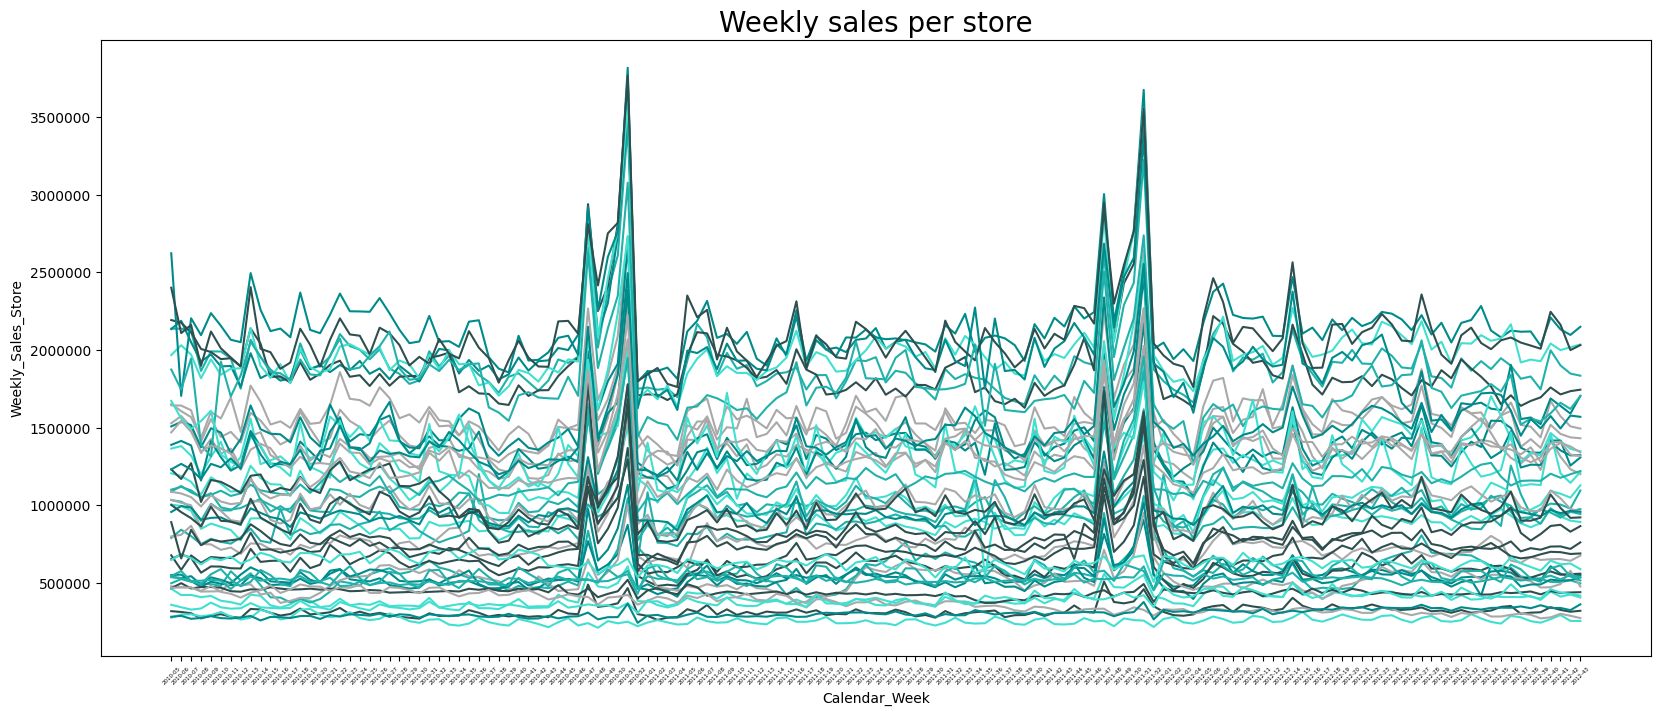

In [18]:
mypal= ['darkgrey', 'lightseagreen', 'turquoise', 'darkcyan', 'darkslategrey']

plt.figure(figsize=(20, 8))

ax = sns.lineplot(x=df1.Calendar_Week, y=df1.Weekly_Sales_Store, hue=df1.Store, palette=mypal)

plt.xticks(rotation=45, fontsize=4)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Weekly sales per store', fontsize=20)
ax.legend().set_visible(False);

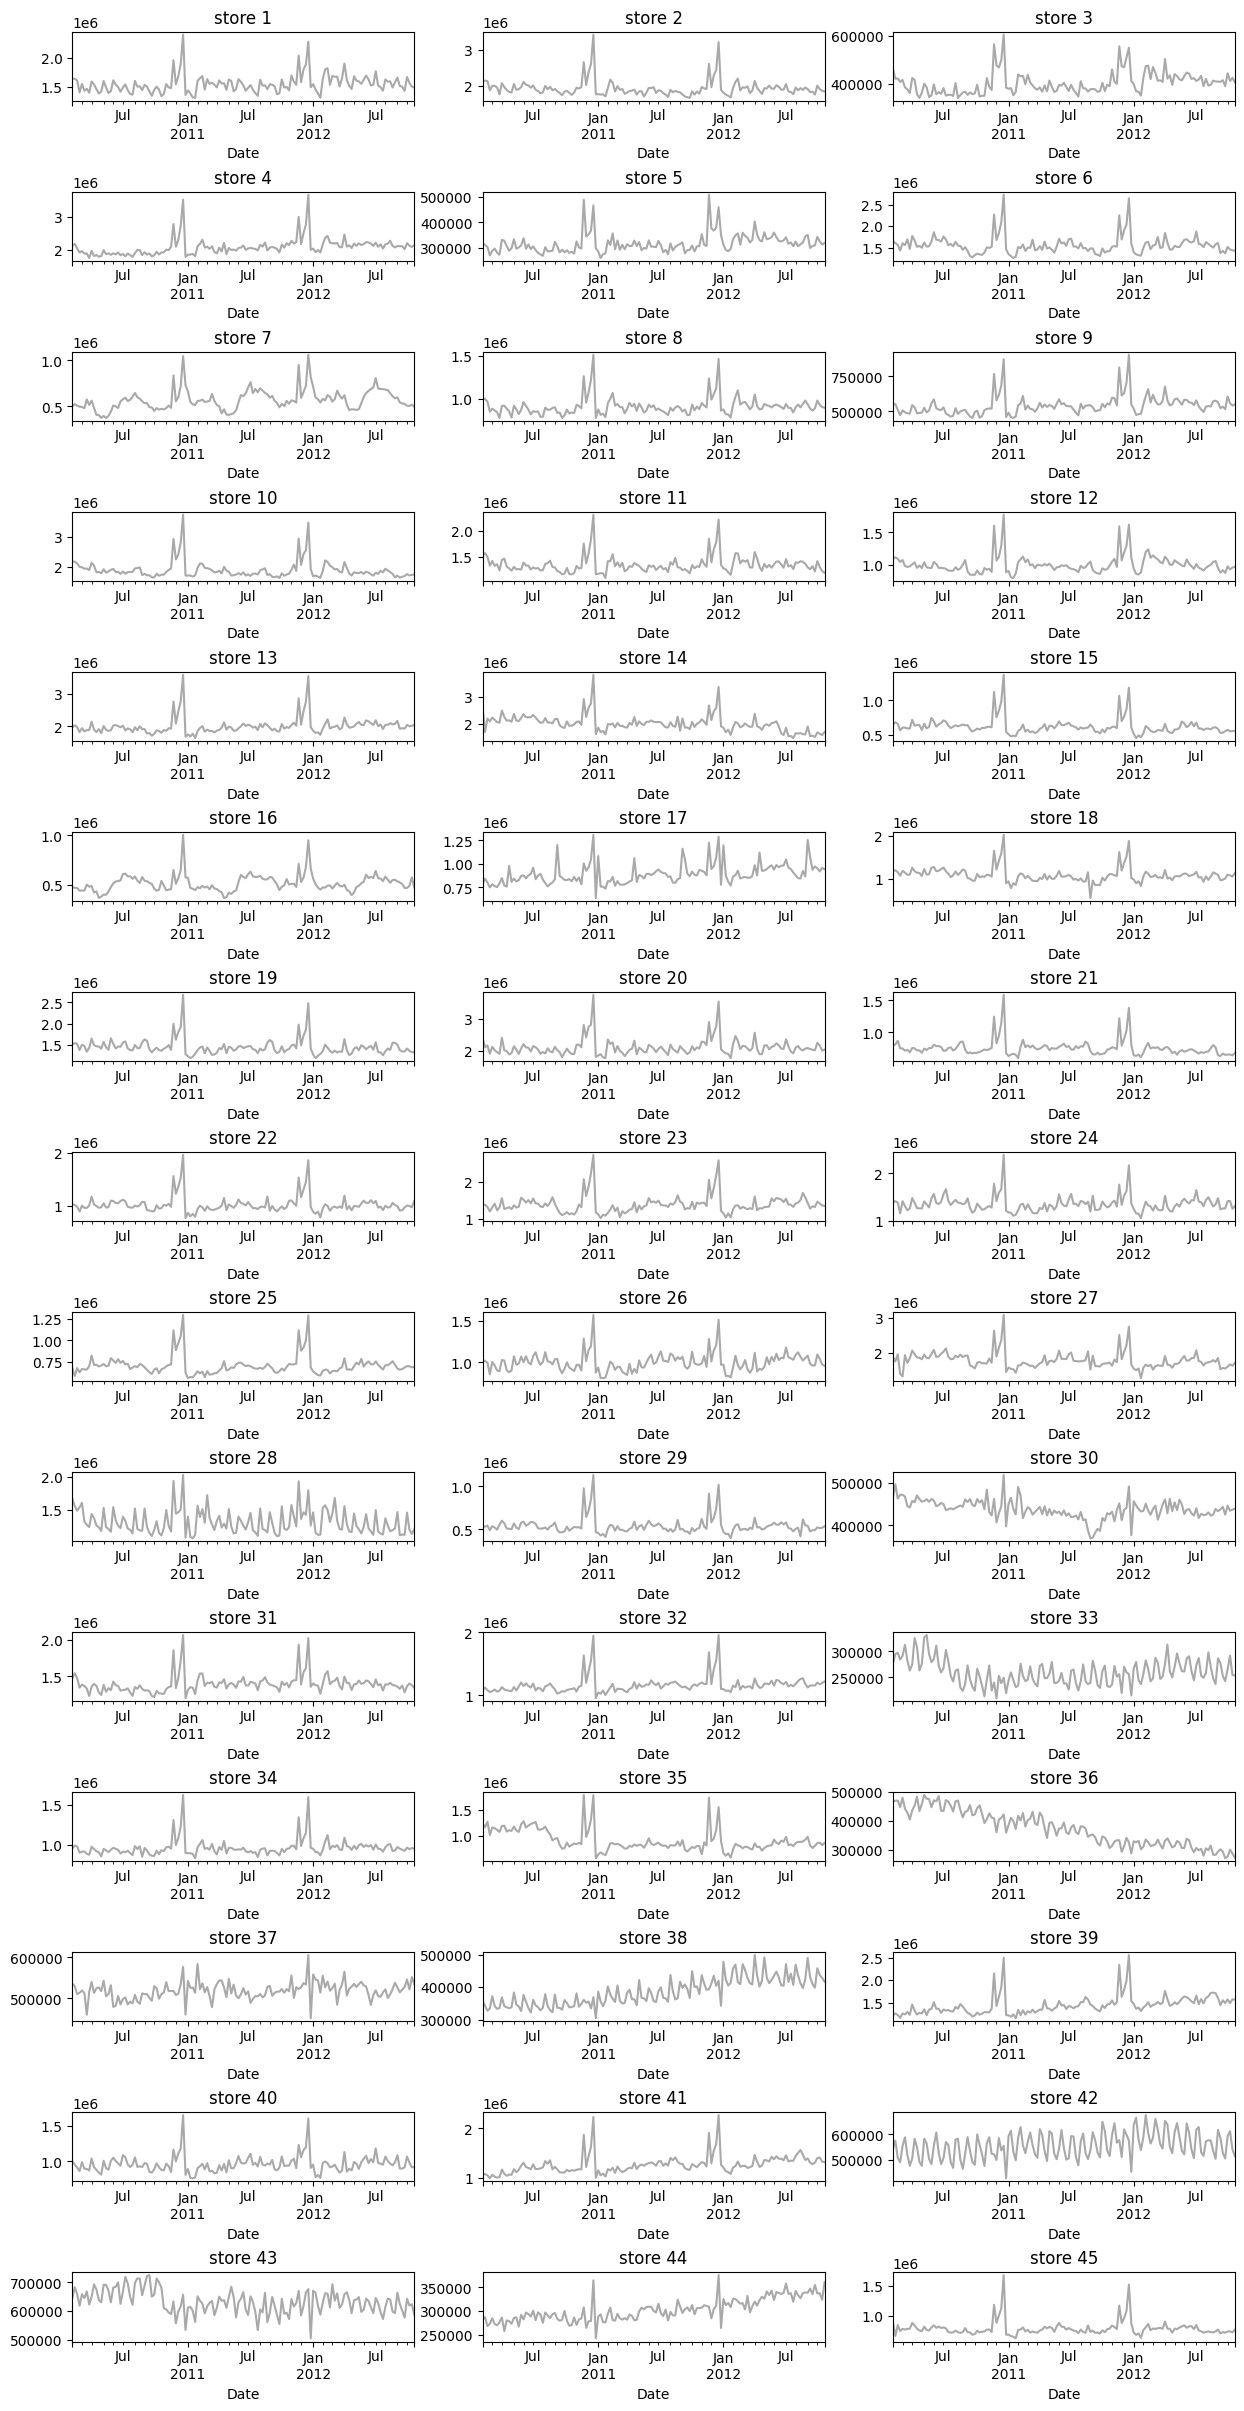

In [19]:
plt.figure(figsize=(15,30))

for store in df.Store.unique():
    data = df[df.Store==store].groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15, 3, store)
    plt.subplots_adjust(hspace=1.3)
    plt.title(f'store {store}')
    data.plot(color='darkgrey')
    #plt.suptitle('Weekly sales by store across time');

The sales of some stores does not show those sales peaks. Why? <br>
Hypothesis: Stores without seasonal peaks do not have the departments, which are selling so much at this dates.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Top 50 weekly sales</div><br>
Now we have a closer look at the 4 peaks (which Departments are the 50th best and on which exactly dates?)


In [20]:
top_50_sales = df.nlargest(50, 'Weekly_Sales')
print('Departments with highest weekly sales:', top_50_sales.Dept.unique())
print('Dates of highest weekly sales:',top_50_sales.Date.unique())

Departments with highest weekly sales: [72  7 92]
Dates of highest weekly sales: <DatetimeArray>
['2010-11-26 00:00:00', '2011-11-25 00:00:00', '2010-12-24 00:00:00',
 '2011-12-23 00:00:00', '2010-02-05 00:00:00', '2010-12-17 00:00:00']
Length: 6, dtype: datetime64[ns]


The Departments with the highest Weekly Sales are Department 72, 7 and 92. With regards of time, they are allocated at Christmas and Thanksgiving.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Weekly sale total (sum) for 2010 and 2011 for each single store</div><br>



In [21]:
#creating a new dataframe with aggregations
df1b = df.query('Year == 2010 or Year == 2011')
df1b = df1b.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
df1b.rename(columns={'Weekly_Sales': 'Year_Sales'}, inplace=True)
df1b['Total_Sales'] = df1b.groupby(['Store'])['Year_Sales'].transform('sum')

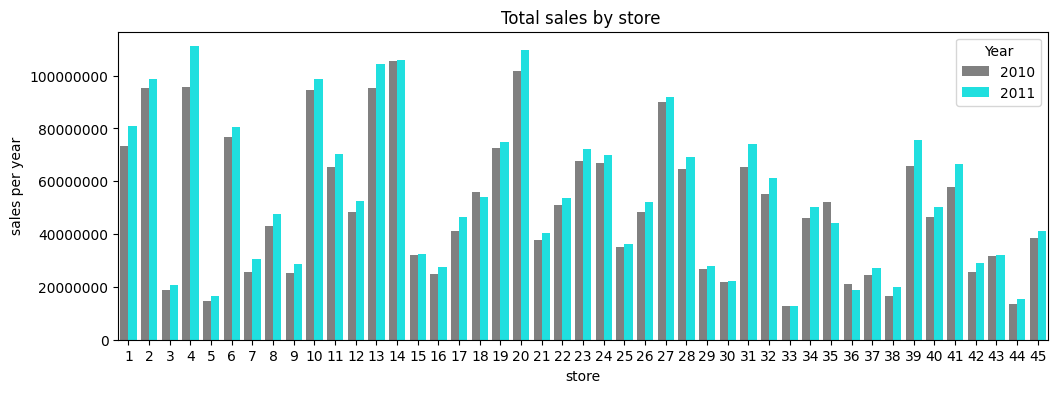

In [22]:
#my_pal=['grey', 'springgreen']
my_pal=['grey', 'cyan']

plt.figure(figsize=(12, 4))

sns.barplot(data=df1b, x='Store', y='Year_Sales', hue='Year', palette=my_pal)
plt.title('Total sales by store ')
plt.xlabel('store')
plt.ylabel('sales per year')
plt.legend(title='Year')
plt.ticklabel_format(style='plain', axis='y');

In this case we dropped 2012 because the last two months (with the seasonal peaks) are missiing in our data.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Top and bottom performer at store level (total sales)</div><br>
Which of the shops are the top 3 best and worst shops?



In [23]:
top_performers = df1b.groupby('Store')['Year_Sales'].sum().nlargest(3).index
bottom_performers = df1b.groupby('Store')['Year_Sales'].sum().nsmallest(3).index

print('Top-performer 2010 and 2011:',top_performers)
print('Bottom-performer 2010 and 2011:',bottom_performers)

Top-performer 2010 and 2011: Index([20, 14, 4], dtype='int64', name='Store')
Bottom-performer 2010 and 2011: Index([33, 44, 5], dtype='int64', name='Store')


Top performers across 2010 and 2011 are stores 4, 14 and 20, while stores 5, 33 and 44 are bottom performer. Hypothesis: Bottom performer lack the seasonal peaks.

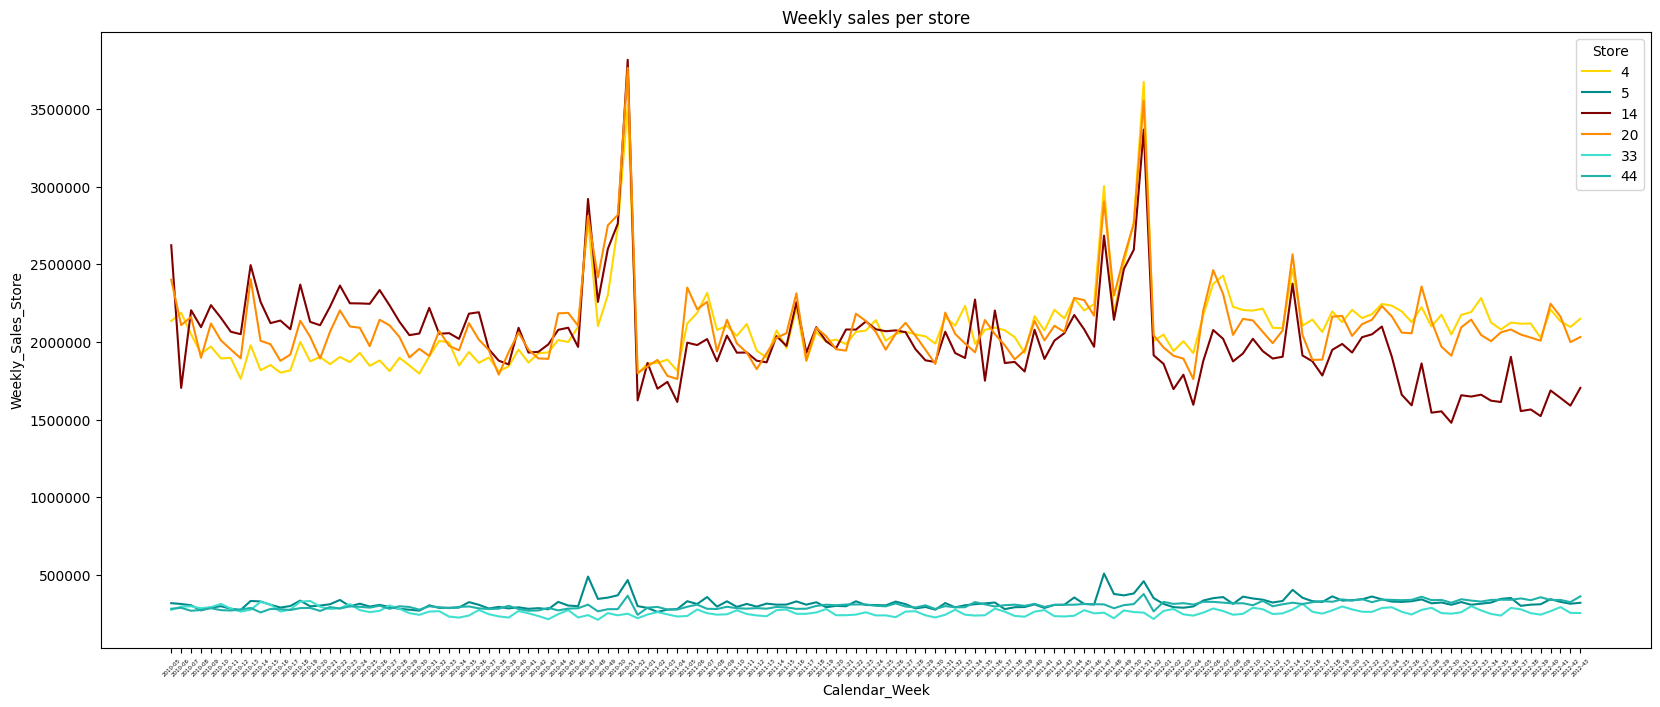

In [24]:
mypal= ['gold', 'darkcyan', 'maroon', 'darkorange', 'turquoise', 'lightseagreen']


plt.figure(figsize=(20, 8))

ax = sns.lineplot(x=df1.query('Store==5 or Store ==33 or Store ==44 or Store==4 or Store ==14 or Store ==20').Calendar_Week, 
                    y=df1.query('Store==5 or Store ==33 or Store ==44 or Store==4 or Store ==14 or Store ==20').Weekly_Sales_Store, 
                    hue=df1.query('Store==5 or Store ==33 or Store ==44 or Store==4 or Store ==14 or Store ==20').Store, palette=mypal)

plt.xticks(rotation=45, fontsize=4)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Weekly sales per store');

As can be seen in the chart, stores 33 and 44 almost completely lack sesonal peaks. Store 5 shows the 4 peaks over the 2 years, but they only reached about 500,000 USD, while the foreseen overview chart shows that the peaks of other stores reach up to 3,500,000 USD.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">A closer look at top and bottom performer at store level (total sales)</div><br>
Lets see how many Departments the top and bottom performer stores have and how many square foot meters



Store 20:

In [25]:
print("Number of Departments in Store 20: ",df[df['Store'] == 20].Dept.nunique())
print("Size of Store 20: ") 
df[df['Store'] == 20].Size.unique()

Number of Departments in Store 20:  78
Size of Store 20: 


array([203742])

Store 14:

In [26]:
print("Number of Departments in Store 20: ", df[df['Store'] == 14].Dept.nunique())
print("Size of Store 14: ") 
df[df['Store'] == 14].Size.unique()

Number of Departments in Store 20:  77
Size of Store 14: 


array([200898])

Store 4:

In [27]:
print("Number of Departments in Store 4: ", df[df['Store'] == 4].Dept.nunique())
print("Size of Store 4: ") 
df[df['Store'] == 4].Size.unique()

Number of Departments in Store 4:  78
Size of Store 4: 


array([205863])

Store 33:

In [28]:
print("Number of Departments in Store 33: ", df[df['Store'] == 33].Dept.nunique())
print("Size of Store 33: ") 
df[df['Store'] == 33].Size.unique()

Number of Departments in Store 33:  63
Size of Store 33: 


array([39690])

Store 44:

In [29]:
print("Number of Departments in Store 44: ", df[df['Store'] == 44].Dept.nunique())
print("Size of Store 44: ") 
df[df['Store'] == 44].Size.unique()

Number of Departments in Store 44:  62
Size of Store 44: 


array([39910])

Store 5:

In [30]:
print("Number of Departments in Store 5: ", df[df['Store'] == 5].Dept.nunique())
print("Size of Store 5: ") 
df[df['Store'] == 5].Size.unique()

Number of Departments in Store 5:  72
Size of Store 5: 


array([34875])

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Top and bottom performer at department level (total sales)</div><br>
Which of the shops are the top 3 best and worst departments?



In [31]:
#creating a new dataframe with aggregations
df1c = df.query('Year == 2010 or Year == 2011')
df1c = df1c.groupby(['Dept', 'Year'])['Weekly_Sales'].sum().reset_index()
df1c.rename(columns={'Weekly_Sales': 'Year_Sales'}, inplace=True)
df1c['Total_Sales'] = df1c.groupby(['Dept'])['Year_Sales'].transform('sum')

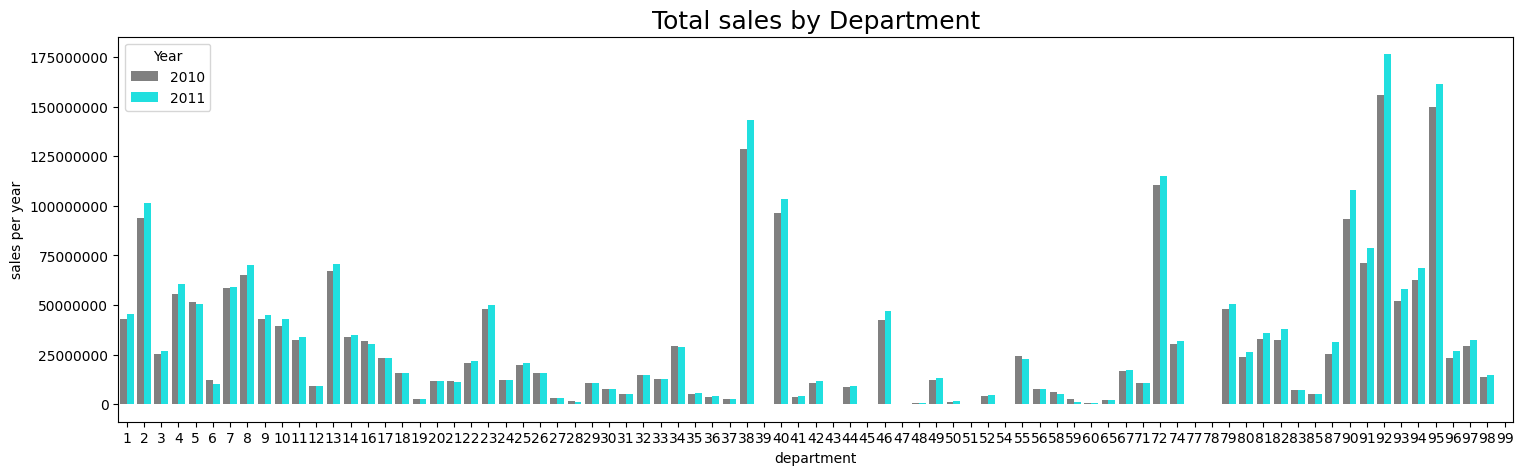

In [32]:
#my_pal=['grey', 'springgreen']
my_pal=['grey', 'cyan']

plt.figure(figsize=(18, 5))

sns.barplot(data=df1c, x='Dept', y='Year_Sales', hue='Year', palette=my_pal)
plt.title('Total sales by Department', fontsize=18)
plt.xlabel('department')
plt.ylabel('sales per year')
plt.legend(title='Year')
plt.ticklabel_format(style='plain', axis='y')

In [33]:
top_performers = df1c.groupby('Dept')['Year_Sales'].sum().nlargest(3).index
bottom_performers = df1c.groupby('Dept')['Year_Sales'].sum().nsmallest(3).index

print('Top-performer 2010 and 2011:',top_performers)
print('Bottom-performer 2010 and 2011:',bottom_performers)

Top-performer 2010 and 2011: Index([92, 95, 38], dtype='int64', name='Dept')
Bottom-performer 2010 and 2011: Index([47, 43, 39], dtype='int64', name='Dept')


<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 1: At the beginning of the month, sales are higher than at the end</div><br>



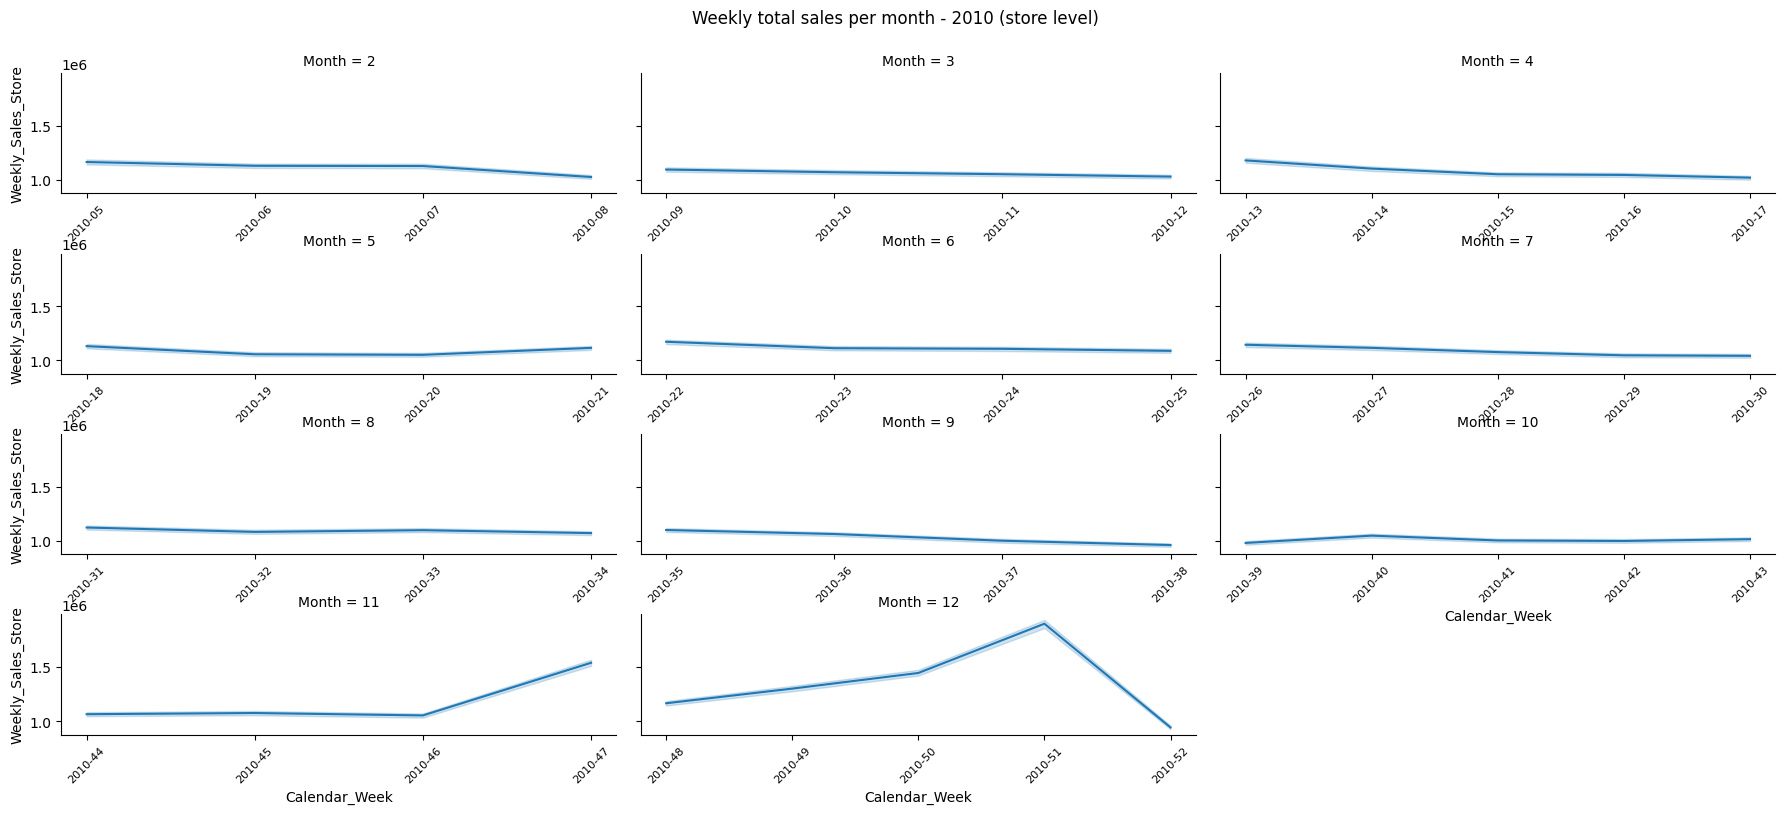

In [34]:
g = sns.FacetGrid(df.query('Year == 2010'), 
        col='Month', 
        col_wrap=3, 
        height=2, 
        aspect=3, 
        sharey=True, 
        sharex=False)

# lineplot for each ax
g.map(sns.lineplot, 'Calendar_Week', 'Weekly_Sales_Store')

# rotate and smaller font
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
    
g.fig.subplots_adjust(hspace=0.5)
g.fig.suptitle('Weekly total sales per month - 2010 (store level)')
g.fig.subplots_adjust(top=0.9);

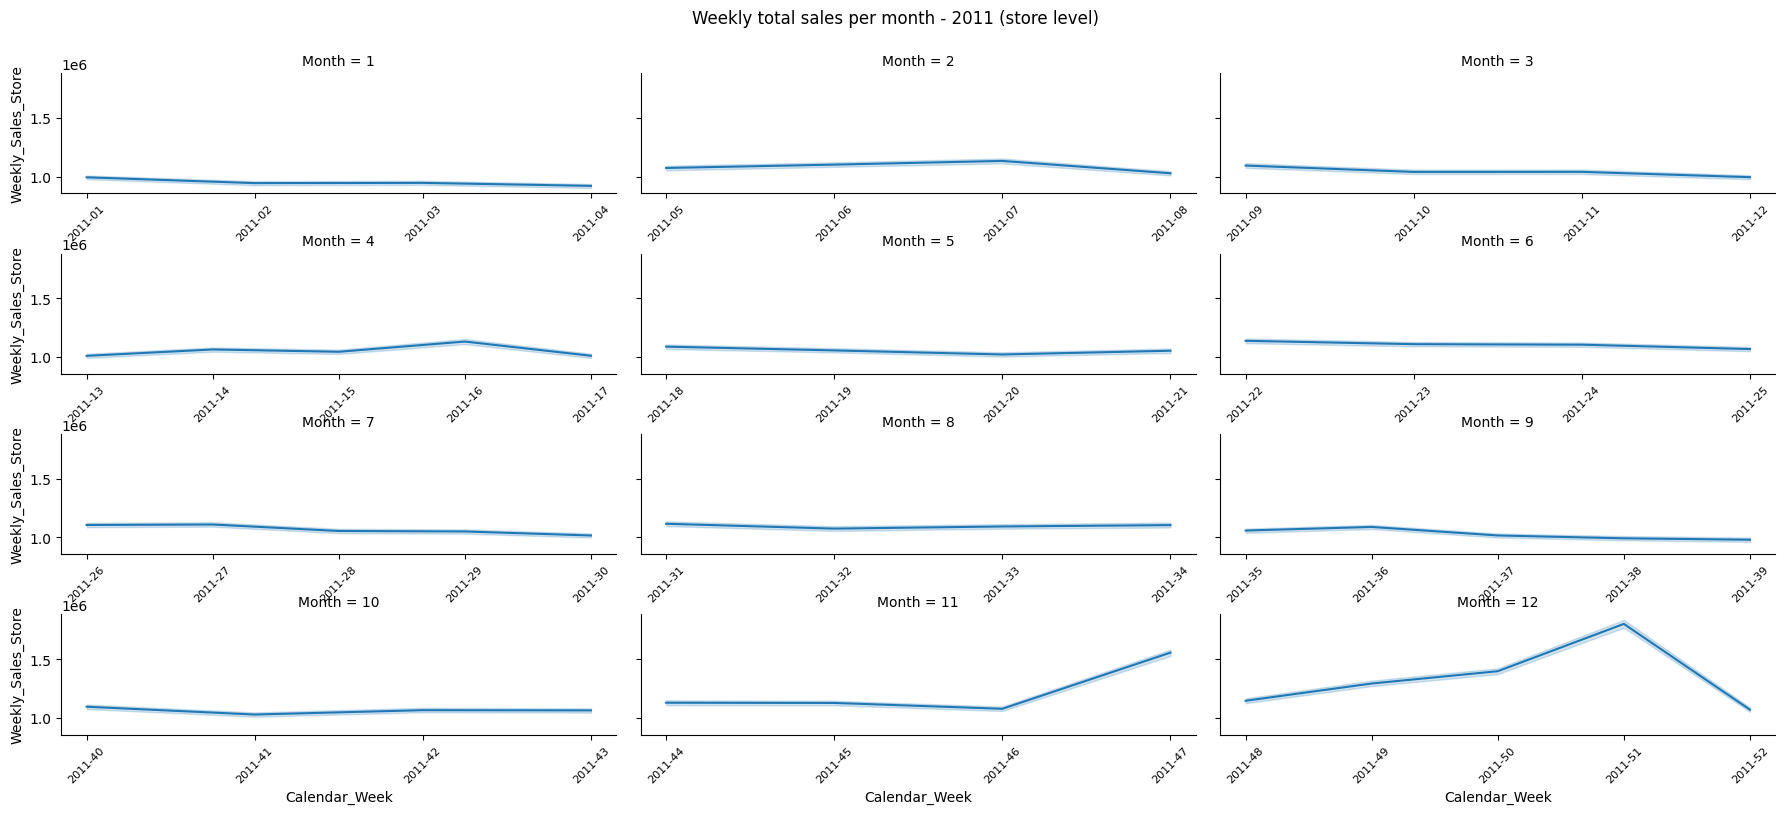

In [35]:
g = sns.FacetGrid(df.query('Year == 2011'), 
        col='Month', 
        col_wrap=3, 
        height=2, 
        aspect=3, 
        sharey=True, 
        sharex=False)

# lineplot for each ax
g.map(sns.lineplot, 'Calendar_Week', 'Weekly_Sales_Store')

# rotate and smaller font
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
    
g.fig.subplots_adjust(hspace=0.5)
g.fig.suptitle('Weekly total sales per month - 2011 (store level)')
g.fig.subplots_adjust(top=0.9);

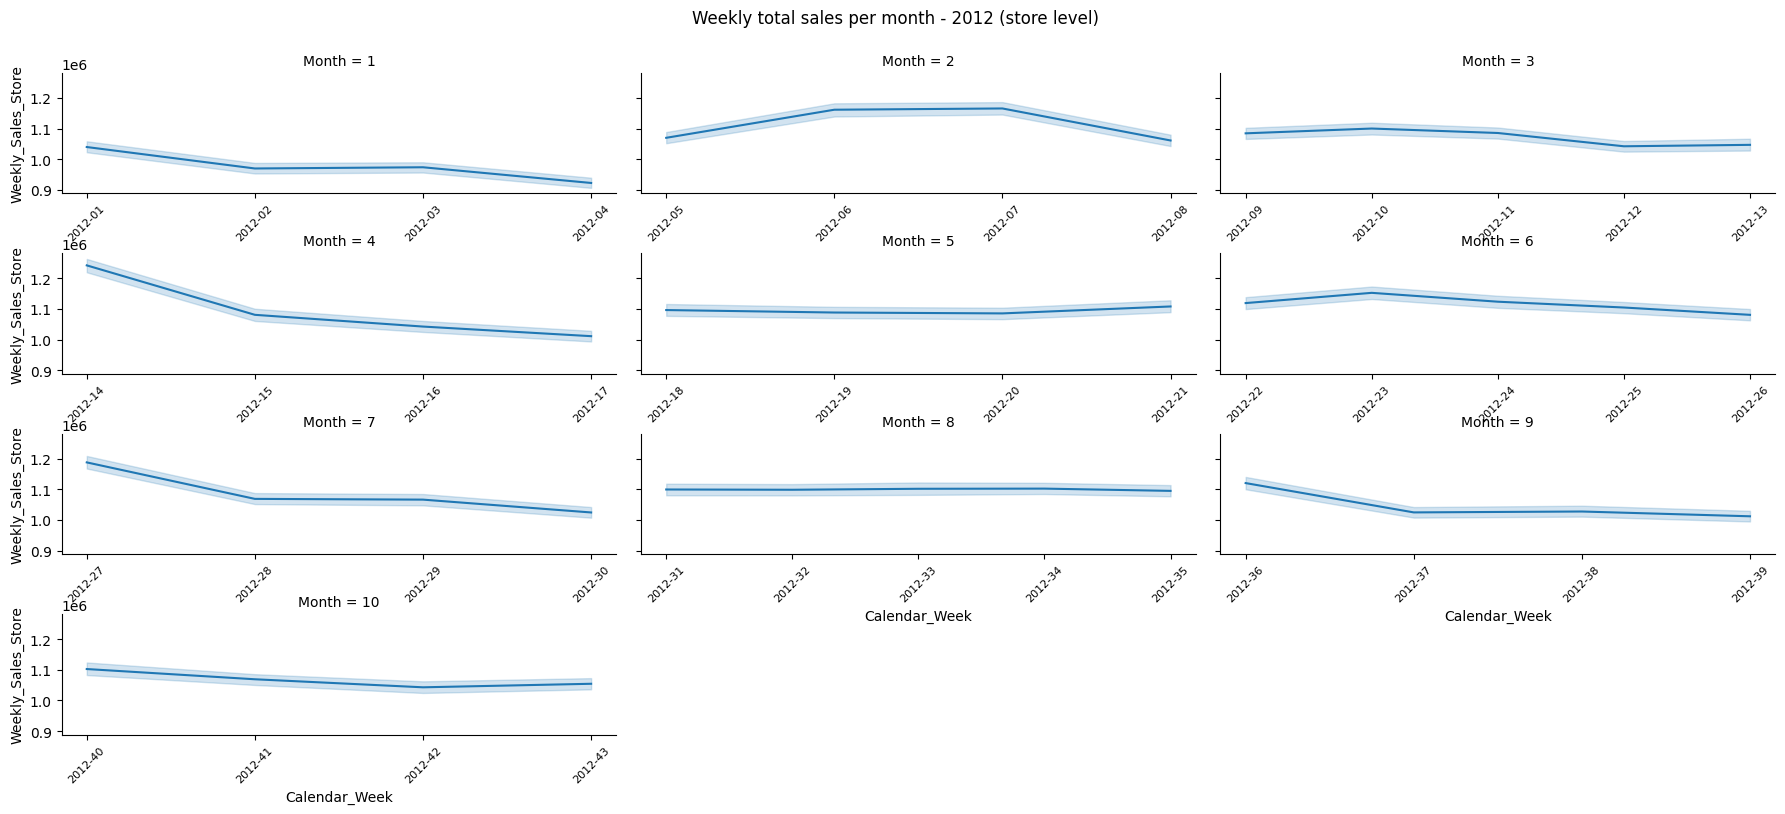

In [36]:
g = sns.FacetGrid(df.query('Year == 2012'), 
        col='Month', 
        col_wrap=3, 
        height=2, 
        aspect=3, 
        sharey=True, 
        sharex=False)

# lineplot for each ax
g.map(sns.lineplot, 'Calendar_Week', 'Weekly_Sales_Store')

# rotate and smaller font
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
    
g.fig.subplots_adjust(hspace=0.5)
g.fig.suptitle('Weekly total sales per month - 2012 (store level)')
g.fig.subplots_adjust(top=0.9);

Result: In some months there can be seen a slightly trend, but overall the Hypothesis 1 must be rejected.

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 2: The lower the fuel price, the higher the sales</div><br>
First we have a look at the distribution of fuel price.

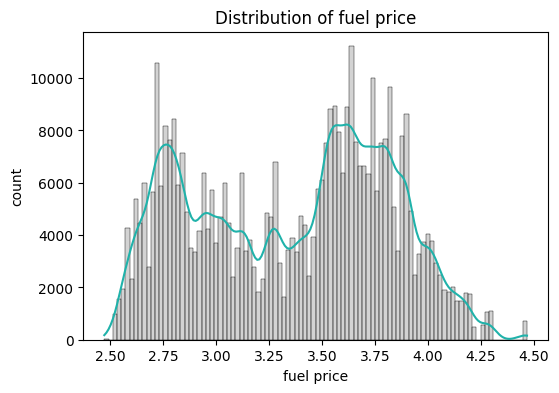

In [37]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(df.Fuel_Price, color='darkgrey', kde = True, bins=100)

ax.lines[0].set_color('lightseagreen')
ax.set_title('Distribution of fuel price')
ax.set_xlabel('fuel price')
ax.set_ylabel('count');

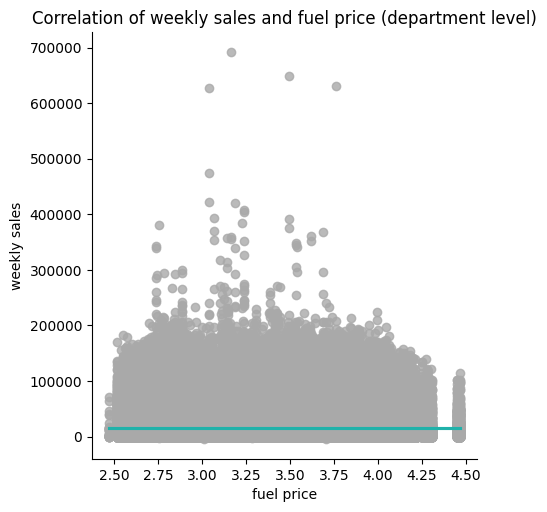

In [38]:
sns.lmplot(data= df, 
           x='Fuel_Price', 
           y='Weekly_Sales', 
           scatter_kws={'color': 'darkgrey'}, 
           line_kws={'color': 'lightseagreen'})

plt.title('Correlation of weekly sales and fuel price (department level)')
plt.xlabel('fuel price')
plt.ylabel('weekly sales');

In [39]:
correlation = df['Weekly_Sales'].corr(df['Fuel_Price'])
print('Pearsons r for weekly sales and fuel price on department level:', correlation)

Pearsons r for weekly sales and fuel price on department level: -0.00012029554499574565


Result: no significant correlation in general between fuel price and weekly sales on department level. <br>
Next looking at store level.

In [40]:
agg_functions = {
    'Weekly_Sales': 'sum',
    'Fuel_Price': 'first'
}

df5 = df.groupby(['Date', 'Store'], as_index=False).agg(agg_functions)

df5.rename(columns={'Weekly_Sales': 'Weekly_Sales_Store'}, inplace=True)

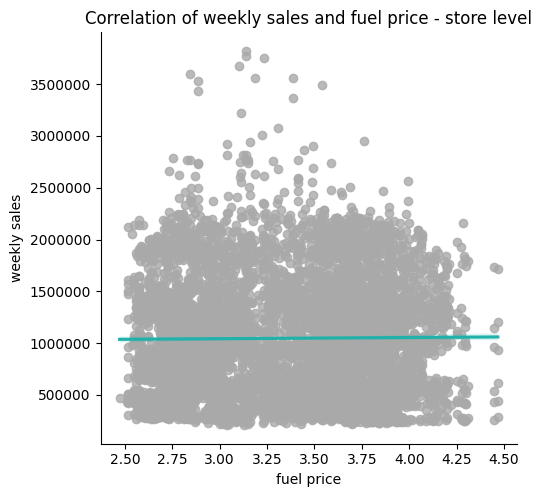

In [41]:
sns.lmplot(data= df5, x='Fuel_Price', y='Weekly_Sales_Store', 
           scatter_kws={'color': 'darkgrey'}, line_kws={'color': 'lightseagreen'})

plt.ticklabel_format(style='plain', axis='y')
plt.title('Correlation of weekly sales and fuel price - store level')
plt.xlabel('fuel price')
plt.ylabel('weekly sales');

In [42]:
correlation = df5['Weekly_Sales_Store'].corr(df5['Fuel_Price'])
print('Pearsons r for weekly sales and fuel price on store level:', correlation)

Pearsons r for weekly sales and fuel price on store level: 0.009463786314475139


On store level there is no correlation as well.

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 3: the bigger the size of a store, the higher the sales</div><br>
First looking at the distribution of store size

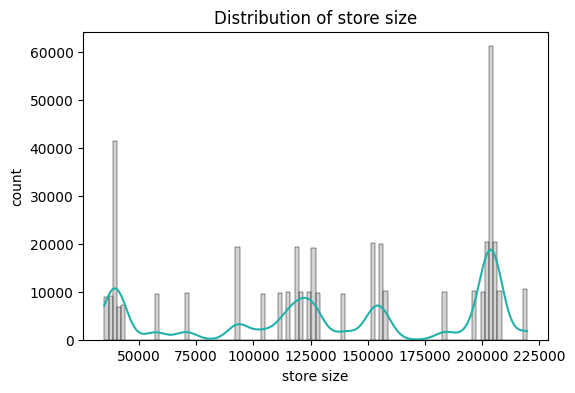

In [43]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(df.Size, color='darkgrey', kde = True, bins=100)

ax.lines[0].set_color('lightseagreen')
ax.set_title('Distribution of store size')
ax.set_xlabel('store size')
ax.set_ylabel('count');

Next follows a view at the size of each of the 45 stores

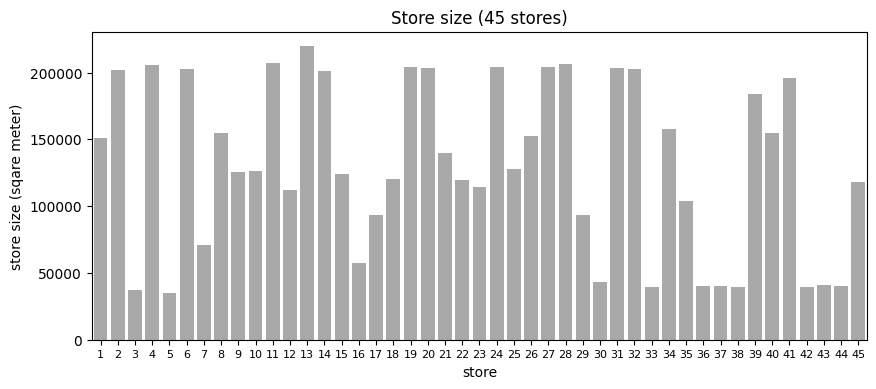

In [44]:
store_lst = []
size_lst = []

for Store, Size in zip(df.Store, df.Size):
    if Store not in store_lst:
        store_lst.append(Store)
        size_lst.append(Size)
    else:
        continue

plt.figure(figsize=(10, 4))

ax = sns.barplot(x=store_lst, y= size_lst, color='darkgrey')

ax.set_title('Store size (45 stores)')
ax.set_xlabel('store')
ax.set_ylabel('store size (sqare meter)')
ax.tick_params(axis='x', labelsize=8);

Next follows the correlation between weekly sales and store size on department level

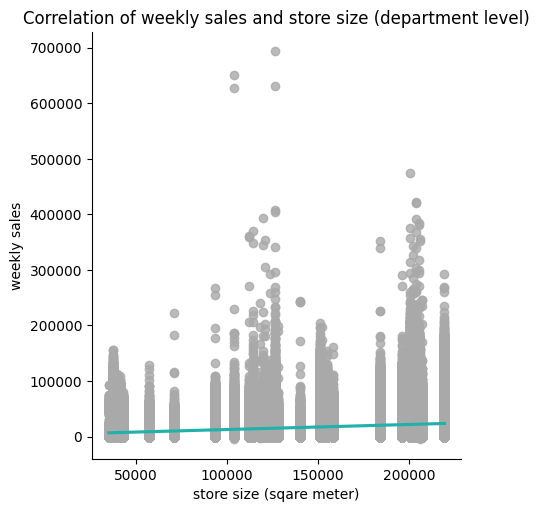

In [45]:
sns.lmplot(data= df, x='Size', y='Weekly_Sales', 
           scatter_kws={'color': 'darkgrey'}, line_kws={'color': 'lightseagreen'})
plt.title('Correlation of weekly sales and store size (department level)')
plt.xlabel('store size (sqare meter)')
plt.ylabel('weekly sales');

In [46]:
correlation = df['Weekly_Sales'].corr(df['Size'])
print('Pearsons r for weekly sales and store size on department level:', correlation)

Pearsons r for weekly sales and store size on department level: 0.24382799226304502


As one can see in the chart, there is no strong correlation. The Pearson's r confirms that finding with a score of 0.24.<br>
Next a look at this correlation on store level.

In [47]:
df3 = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
unique_stores_df = df[['Store', 'Size']].drop_duplicates()
df3 = df3.merge(unique_stores_df, on='Store', how='left')
df3.rename(columns={'Weekly_Sales': 'Weekly_Sales_Store'}, inplace=True)
df3['Total_Sales'] = df3.groupby(['Store'])['Weekly_Sales_Store'].transform('sum')

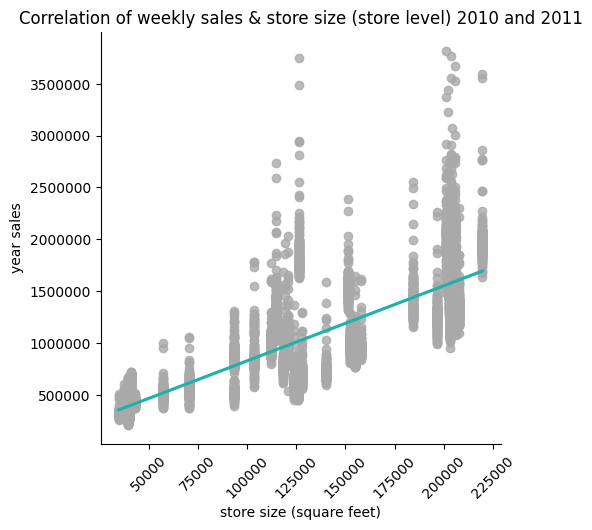

In [48]:
sns.lmplot(data= df3, 
           x='Size',
           y='Weekly_Sales_Store', 
           scatter_kws={'color': 'darkgrey'}, 
           line_kws={'color': 'lightseagreen'},
           #hue='Year'
           )

plt.ticklabel_format(style='plain', axis='y')
plt.title('Correlation of weekly sales & store size (store level) 2010 and 2011')
plt.xlabel('store size (square feet)')
plt.ylabel('year sales')
plt.xticks(rotation=45);

In [49]:
correlation = df3['Weekly_Sales_Store'].corr(df3['Size'])
print('Pearsons r for weekly sales and store size on store level:', correlation)

Pearsons r for weekly sales and store size on store level: 0.810468494651372


As one can see in the chart, there is a stronger correlation on store level. The Pearson's r confirms that finding with a score of 0.81.<br>
Our Hypothesis can be reformulated as follows: The higher the store size, the higher the total sale of the store. The store size also correlates with the sales on department level, but not as strongly as on store level.

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 4: on Holidays, the sales are higher or lower than the average sales</div><br>
First looking at the distribution of holidays. Now we want to see, if the mean of the Weekly Sales changes on weeks with holidays or not

In [50]:
mean_sales_by_holiday = df.groupby('IsHoliday')['Weekly_Sales'].mean()
mean_sales_by_holiday

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

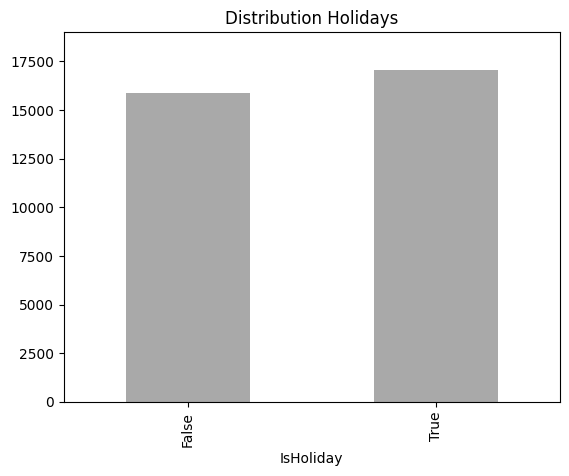

In [51]:
mean_sales_by_holiday.plot(kind='bar', color='darkgrey')
plt.title('Distribution Holidays')
plt.ylim(0, 19000);

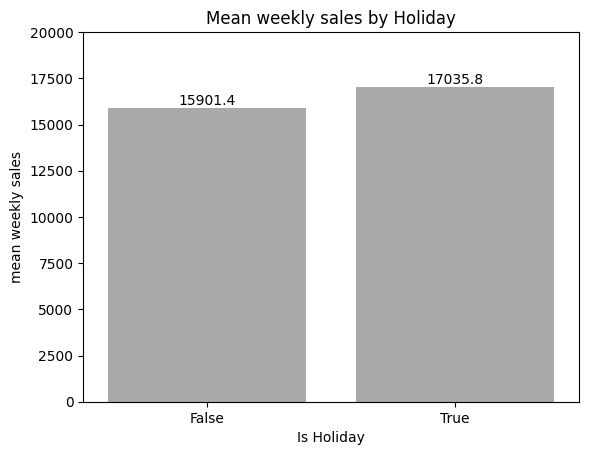

In [52]:
ax = sns.barplot(x=mean_sales_by_holiday.index, y=mean_sales_by_holiday.values, color='darkgrey')
ax.bar_label(ax.containers[0])                           
plt.xlabel('Is Holiday')
plt.ylabel('mean weekly sales')
plt.title('Mean weekly sales by Holiday')
plt.ylim(0, 20000);

Result: Hypothesis is correct, in Weeks with a holiday, Sales are on average 17.035,35 Dollars, and when there is no holiday, the average weekly sales are 15.901,45Dollars.

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 5: The higher the unemployement rate, the lower the sales</div><br>
First, have a closer look at the distribution and statistics of the unemployment rate.

In [53]:
df['Unemployment'].describe().round(2)

count    421570.00
mean          7.96
std           1.86
min           3.88
25%           6.89
50%           7.87
75%           8.57
max          14.31
Name: Unemployment, dtype: float64

The unemployment rate (in %) lies between 3.88 (min) and 14.31 (max). <br>
The average  unemployment rate is 7.96 (mean) resp. 7.87 (median).

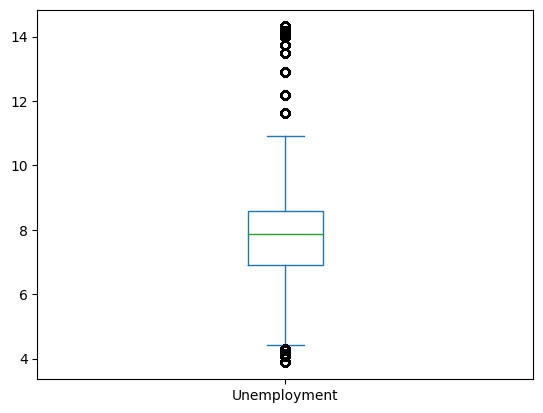

In [54]:
df['Unemployment'].plot(kind='box');

Most of the data lies between around 4 and 11 %.<br> 
#There are only a few values outside of this range, and they are not extremly higher or lower.

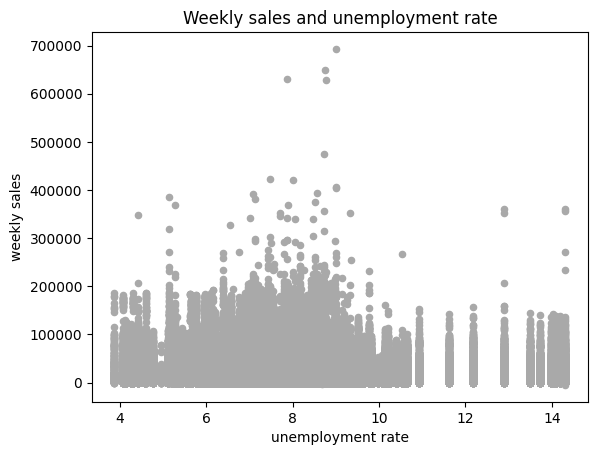

In [55]:
df.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', color='darkgrey')
plt.title('Weekly sales and unemployment rate')
plt.ylabel('weekly sales')
plt.xlabel('unemployment rate');

In [56]:
sales_without_outliers = df[df['Weekly_Sales'] < 200000]

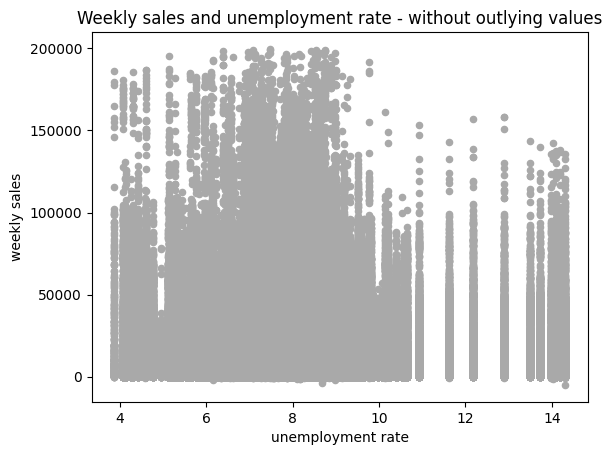

In [57]:
sales_without_outliers.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', color='darkgrey')
plt.title('Weekly sales and unemployment rate - without outlying values')
plt.ylabel('weekly sales')
plt.xlabel('unemployment rate');

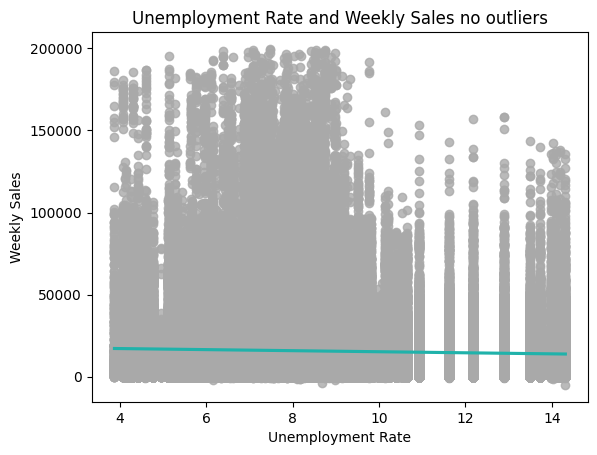

In [58]:
sns.regplot(
            data=sales_without_outliers, 
            x='Unemployment', 
            y='Weekly_Sales', 
            color='darkgrey', 
            scatter=True, 
            line_kws={"color": "lightseagreen"})

plt.title("Unemployment Rate and Weekly Sales no outliers")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 6: There are certain shop types, which have higher sales than others</div><br>

First, have a closer look at the distribution of the shop types:


In [59]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [60]:
df['Type'].value_counts(normalize=True).round(2)

Type
A    0.51
B    0.39
C    0.10
Name: proportion, dtype: float64

In [61]:
mean_sales_by_type = df.groupby('Type')['Weekly_Sales'].mean().round(2)
mean_sales_by_type

Type
A    20099.57
B    12237.08
C     9519.53
Name: Weekly_Sales, dtype: float64

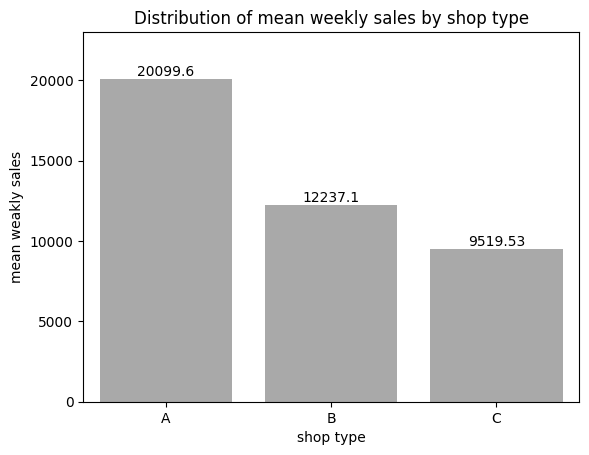

In [62]:
ax = sns.barplot(x=mean_sales_by_type.index, y=mean_sales_by_type.values, color='darkgrey')
ax.bar_label(ax.containers[0])
plt.ylim(0, 23000)
plt.xlabel('shop type')
plt.ylabel('mean weakly sales')
plt.title('Distribution of mean weekly sales by shop type');

<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 7: The temperature has an influence on weekly sales (the higher, the worse?)</div><br>


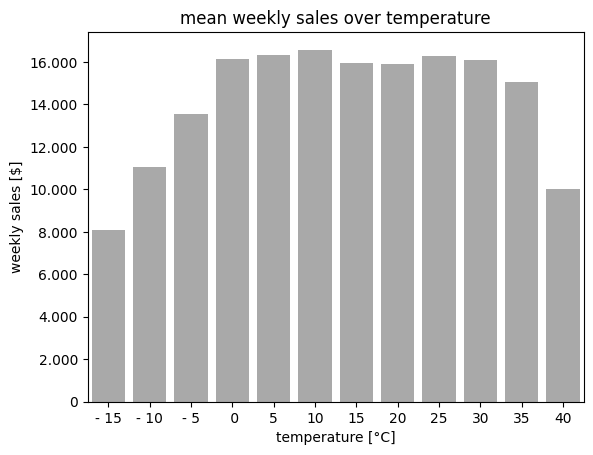

In [63]:
import pandas as pd
import matplotlib.ticker as ticker

#Make bins for temperature in df

temp_bins = pd.cut(df['Temp_Celsius'],[-20,-15,-10,-5,0,5,10,15,20,25,30,35,40],
                   labels = ['- 15', '- 10','- 5',' 0','5','10','15','20','25','30','35','40'],
                   )
temp_bins.name = "temp_binned"
df_temp = df.join(temp_bins, how = 'inner')
f0 = sns.barplot (data = df_temp, x = 'temp_binned', y = 'Weekly_Sales', errorbar = None, color = 'darkgrey')

f0.set_title('mean weekly sales over temperature')
f0.set_xlabel('temperature [°C]')
f0.set_ylabel('weekly sales [$]')
f0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))



<Figure size 1000x600 with 0 Axes>

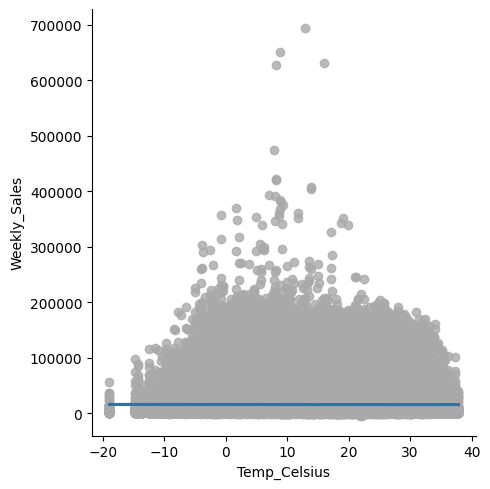

In [64]:
x = df.groupby(by="Date")['Temp_Celsius'].mean()
y =  df.groupby(by="Date")['Weekly_Sales'].sum()


f1 = plt.figure(figsize=(10, 6))
f1.ax1 = sns.lmplot(data = df, 
                    x = 'Temp_Celsius', 
                    y = 'Weekly_Sales',
                    scatter_kws={'color': 'darkgrey'});

#### Result: 

* Temperatures of ~ - 15 °C lead to very low weekly sales (approx. 8.000 $ per store in average).
* Temperatures higher than 25 °C lead to constantly decreasing sales --> the higher the temperatures, the lower the weekly_Sales
* data for 2012 partly missing --> no high shopping values available

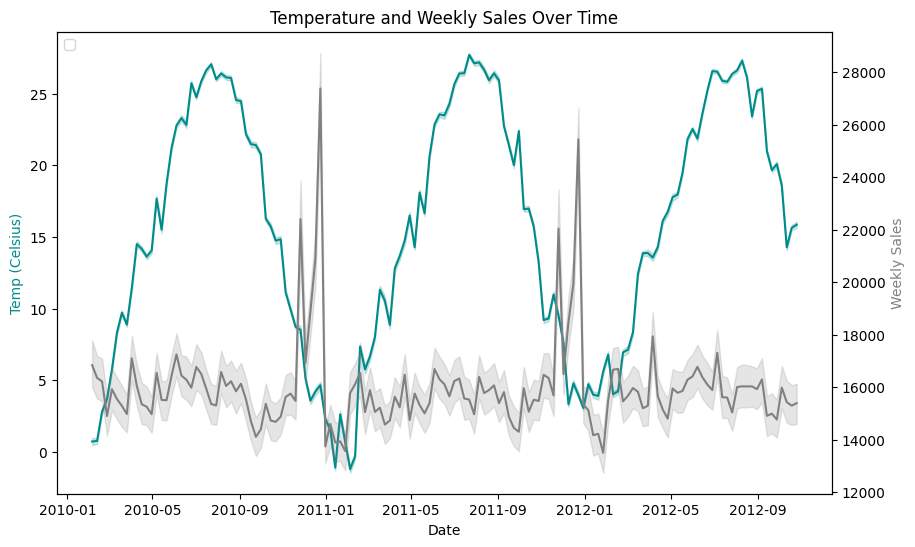

In [65]:
# Create the Seaborn line plot
plt.figure(figsize=(10, 6))

# Plot Temp_Celsius on the first y-axis (red)
ax1 = sns.lineplot(x='Date', y='Temp_Celsius', data=df, color='darkcyan')
#ax1 = sns.scatterplot(x='Date', y='Temp_Celsius', data=df, color='red',)
ax1.set_ylabel('Temp (Celsius)', color='darkcyan')

# Plot Weekly_Sales on the second y-axis (blue)
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Date', y='Weekly_Sales', ax=ax2, color='grey')
ax2.set_ylabel('Weekly Sales', color='grey')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title and show the plot
plt.title('Temperature and Weekly Sales Over Time')
plt.show()

# * For every store and every department there's s date incl. weekly_Sales --> variance in the blue line plot

In [66]:
df.Weekly_Sales.nlargest(5)

95373     693099.36
338013    649770.18
95425     630999.19
337961    627962.93
135665    474330.10
Name: Weekly_Sales, dtype: float64

#### Result: 

2 main peaks at the end of the year: most probably Thanksgiving and Christmas, after Christmas there's a decrease in Sales due to "New-Year holidays.


<div style="background-color: lightyellow; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hypothesis 8: The higher the CPI, the lower the sales</div><br>

<Figure size 1000x600 with 0 Axes>

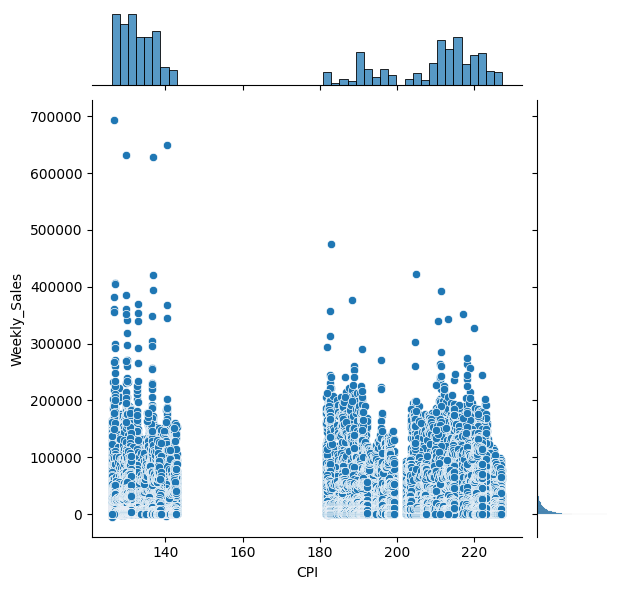

In [67]:
f1 = plt.figure(figsize=(10, 6))
f1.ax1 = sns.jointplot(data = df, x = 'CPI', y = 'Weekly_Sales', palette= 'bright')
# available palettes: (deep, muted, bright, pastel, dark, colorblind)
plt.show();

In [68]:
df.head()
#
df_pp = df.drop(['Store', 'Dept', 'Date', 'IsHoliday', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment', 'Type', 'Calendar_Week', 'Size'], axis = 1)
df_pp.head();
#sns.pairplot(data = df)

#### Result: 

+ CPI betwen 150 and 180 is missing. 
+ CPI is increasing each year (inflation).
+ Difficult to see any correlations between CPI and weekly Sales, because CPI is only available for 2 years.
+ 2012 is difficult to interpret for overall Sales, because end of the year data is missing.


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Correlations</div><br>



In [69]:
numeric_type= pd.get_dummies(df['Type'], prefix='Type')
df_numeric = pd.concat([df, numeric_type], axis=1)

In [70]:
corr_variables = ['Weekly_Sales', 'Date', 'IsHoliday', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Temp_Celsius', 'Type_A', 'Type_B', 'Type_C']
corr_matrix = df_numeric[corr_variables].corr()
corr_matrix

Weekly_Sales      Date  IsHoliday  Fuel_Price       CPI   
Weekly_Sales      1.000000 -0.000663   0.012774   -0.000120 -0.020921  \
Date             -0.000663  1.000000  -0.013017    0.771913  0.077001   
IsHoliday         0.012774 -0.013017   1.000000   -0.078281 -0.001944   
Fuel_Price       -0.000120  0.771913  -0.078281    1.000000 -0.164210   
CPI              -0.020921  0.077001  -0.001944   -0.164210  1.000000   
Unemployment     -0.025864 -0.243370   0.010460   -0.033853 -0.299953   
Size              0.243828 -0.005437   0.000593    0.003361 -0.003314   
Temp_Celsius     -0.002312  0.147066  -0.155953    0.143859  0.182108   
Type_A            0.185417 -0.002467   0.000451   -0.037973  0.083739   
Type_B           -0.131219 -0.000714   0.000167    0.037317 -0.081817   
Type_C           -0.095388  0.005245  -0.001017    0.002652 -0.006615   

              Unemployment      Size  Temp_Celsius    Type_A    Type_B   
Weekly_Sales     -0.025864  0.243828     -0.002312  0.185417 -0.131219  \
Date             -0.243370 -0.005437      0.147066 -0.002467 -0.000714   
IsHoliday         0.010460  0.000593     -0.155953  0.000451  0.000167   
Fuel_Price       -0.033853  0.003361      0.143859 -0.037973  0.037317   
CPI              -0.299953 -0.003314      0.182108  0.083739 -0.081817   
Unemployment      1.000000 -0.068238      0.096734 -0.092574 -0.013435   
Size             -0.068238  1.000000     -0.058315  0.762998 -0.455646   
Temp_Celsius      0.096734 -0.058315      1.000000  0.024489 -0.109032   
Type_A           -0.092574  0.762998      0.024489  1.000000 -0.813861   
Type_B           -0.013435 -0.455646     -0.109032 -0.813861  1.000000   
Type_C            0.175263 -0.528852      0.135656 -0.342812 -0.266848   

                Type_C  
Weekly_Sales -0.095388  
Date          0.005245  
IsHoliday    -0.001017  
Fuel_Price    0.002652  
CPI          -0.006615  
Unemployment  0.175263  
Size         -0.528852  
Temp_Celsius  0.135656  
Type_A       -0.342812  
Type_B       -0.266848  
Type_C        1.000000

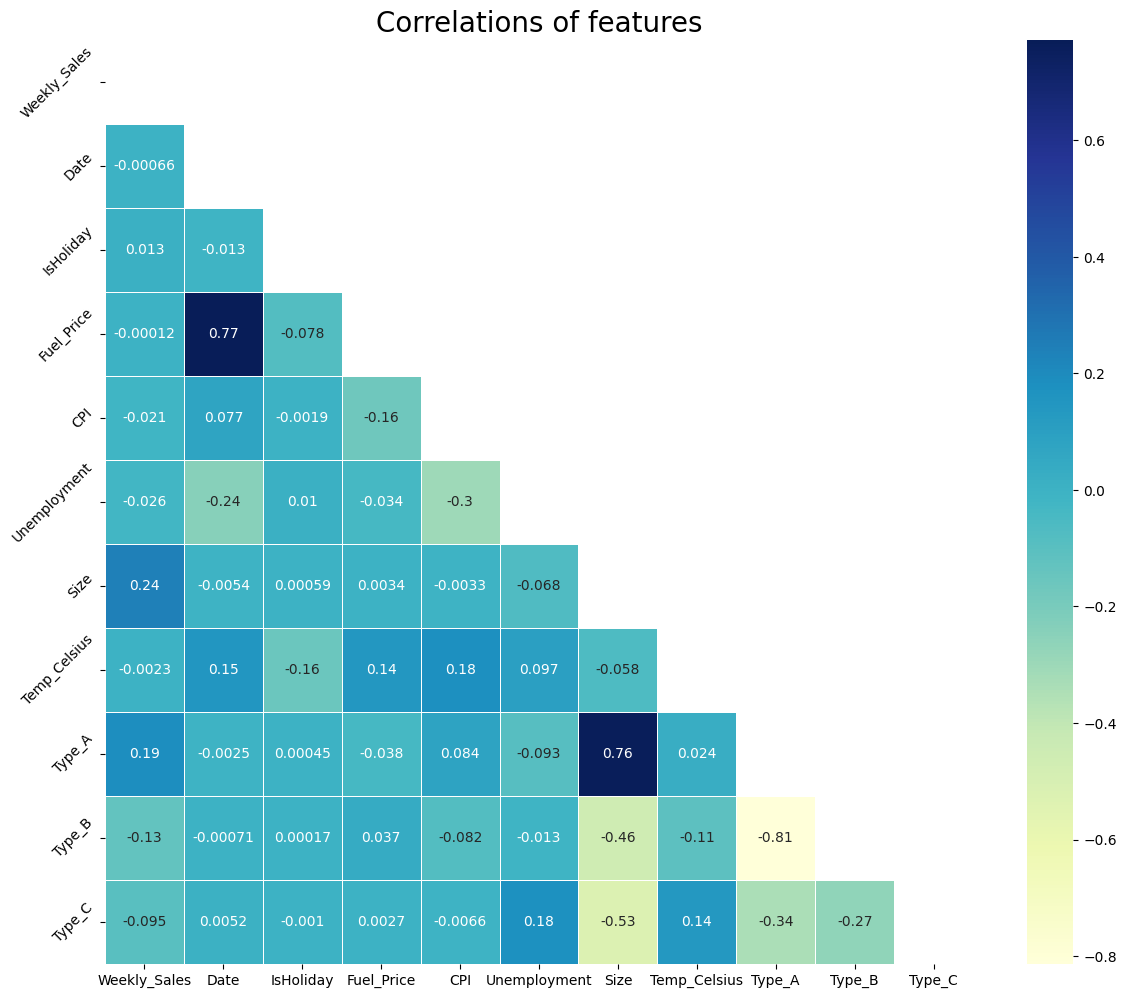

In [71]:
plt.figure(figsize=(14, 12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='YlGnBu', mask=np.triu(corr_matrix))
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.set_title('Correlations of features', fontsize=20);

There is no strong correlation between weekly sales and any of the features. The highest r value is reached by weekly and size with 0.24, second highest is weekly sales" and type A with 0.19. 
<br><br>
But there is also a strong correlation between Type_A, Type_B and Type_C and Size, so because of Collinearity we should throw the Types out.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Negative and zero sales</div><br>

In [72]:
df_negative = df[df['Weekly_Sales'] < 0]
print('Amount of negative numbers in Weekly Sales: ', df_negative['Weekly_Sales'].count())

Amount of negative numbers in Weekly Sales:  1285


In [73]:
weekly_sales_zero = df[df['Weekly_Sales'] == 0].Weekly_Sales.count()
print('Observations with a weekly sales of 0:', weekly_sales_zero )

Observations with a weekly sales of 0: 73


Negative sales can be explained by returns, complaints and voucher redemptions, especially since negative sales are often found in the data after Christmas. In consultation with the Sales Department, this suggestion could be proofed.

<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">EDA - Explorative Data Analysis - second iteration</div>


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data</div><br>

In [74]:
df = pd.read_pickle('../data/data_combined_clean.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Finding missing observations</div>

In [75]:
df.Weekly_Sales.isnull().value_counts()

Weekly_Sales
False    421570
Name: count, dtype: int64

In [76]:
grouped_counts = df.groupby(['Store', 'Dept']).size().reset_index(name='Count_Present_CW')
grouped_counts.shape

(3331, 3)

We have 3331 unique store-dept combinations.

In [77]:
df.Calendar_Week.nunique()

143

If there are 143 values for a store-dept combination in the count of present calendar weeks, we have observations for each calendar week.

In [78]:
ideal_val = 143*3331
print('ideal value:',ideal_val)
actual_val = df.Weekly_Sales.value_counts().sum()
print('actual value:',actual_val)
missing_obs = ideal_val - actual_val
print('missing observations:', missing_obs)

ideal value: 476333
actual value: 421570
missing observations: 54763


We have 421.570 observations, while 476.333 would be the value if all KW were available for all store-dept combinations. So 54.763 observations are missing.

In [79]:
print(grouped_counts.query('Count_Present_CW == 143'))

      Store  Dept  Count_Present_CW
0         1     1               143
1         1     2               143
2         1     3               143
3         1     4               143
4         1     5               143
...     ...   ...               ...
3323     45    91               143
3324     45    92               143
3325     45    93               143
3327     45    95               143
3329     45    97               143

[2660 rows x 3 columns]


Of the 3331 store-dept combinationscombinations, we have all calendar weeks (dates) for 2660 combinations.

In [80]:
print(grouped_counts.query('Count_Present_CW != 143'))

      Store  Dept  Count_Present_CW
16        1    18               113
41        1    45                71
43        1    47                22
44        1    48               125
46        1    51                33
...     ...   ...               ...
3314     45    78                 8
3316     45    80               130
3326     45    94               134
3328     45    96                 2
3330     45    98               135

[671 rows x 3 columns]


Of the 3331 store-dept combinations, 671 combinations are missing at least 1 calendar week (date).

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">The following a visualisation of the missing observations</div>

In [81]:
grouped_counts_df = pd.DataFrame(grouped_counts)
grouped_counts_df['Count_Missing_CW'] = 143 - grouped_counts_df['Count_Present_CW']

<Figure size 1200x2400 with 0 Axes>

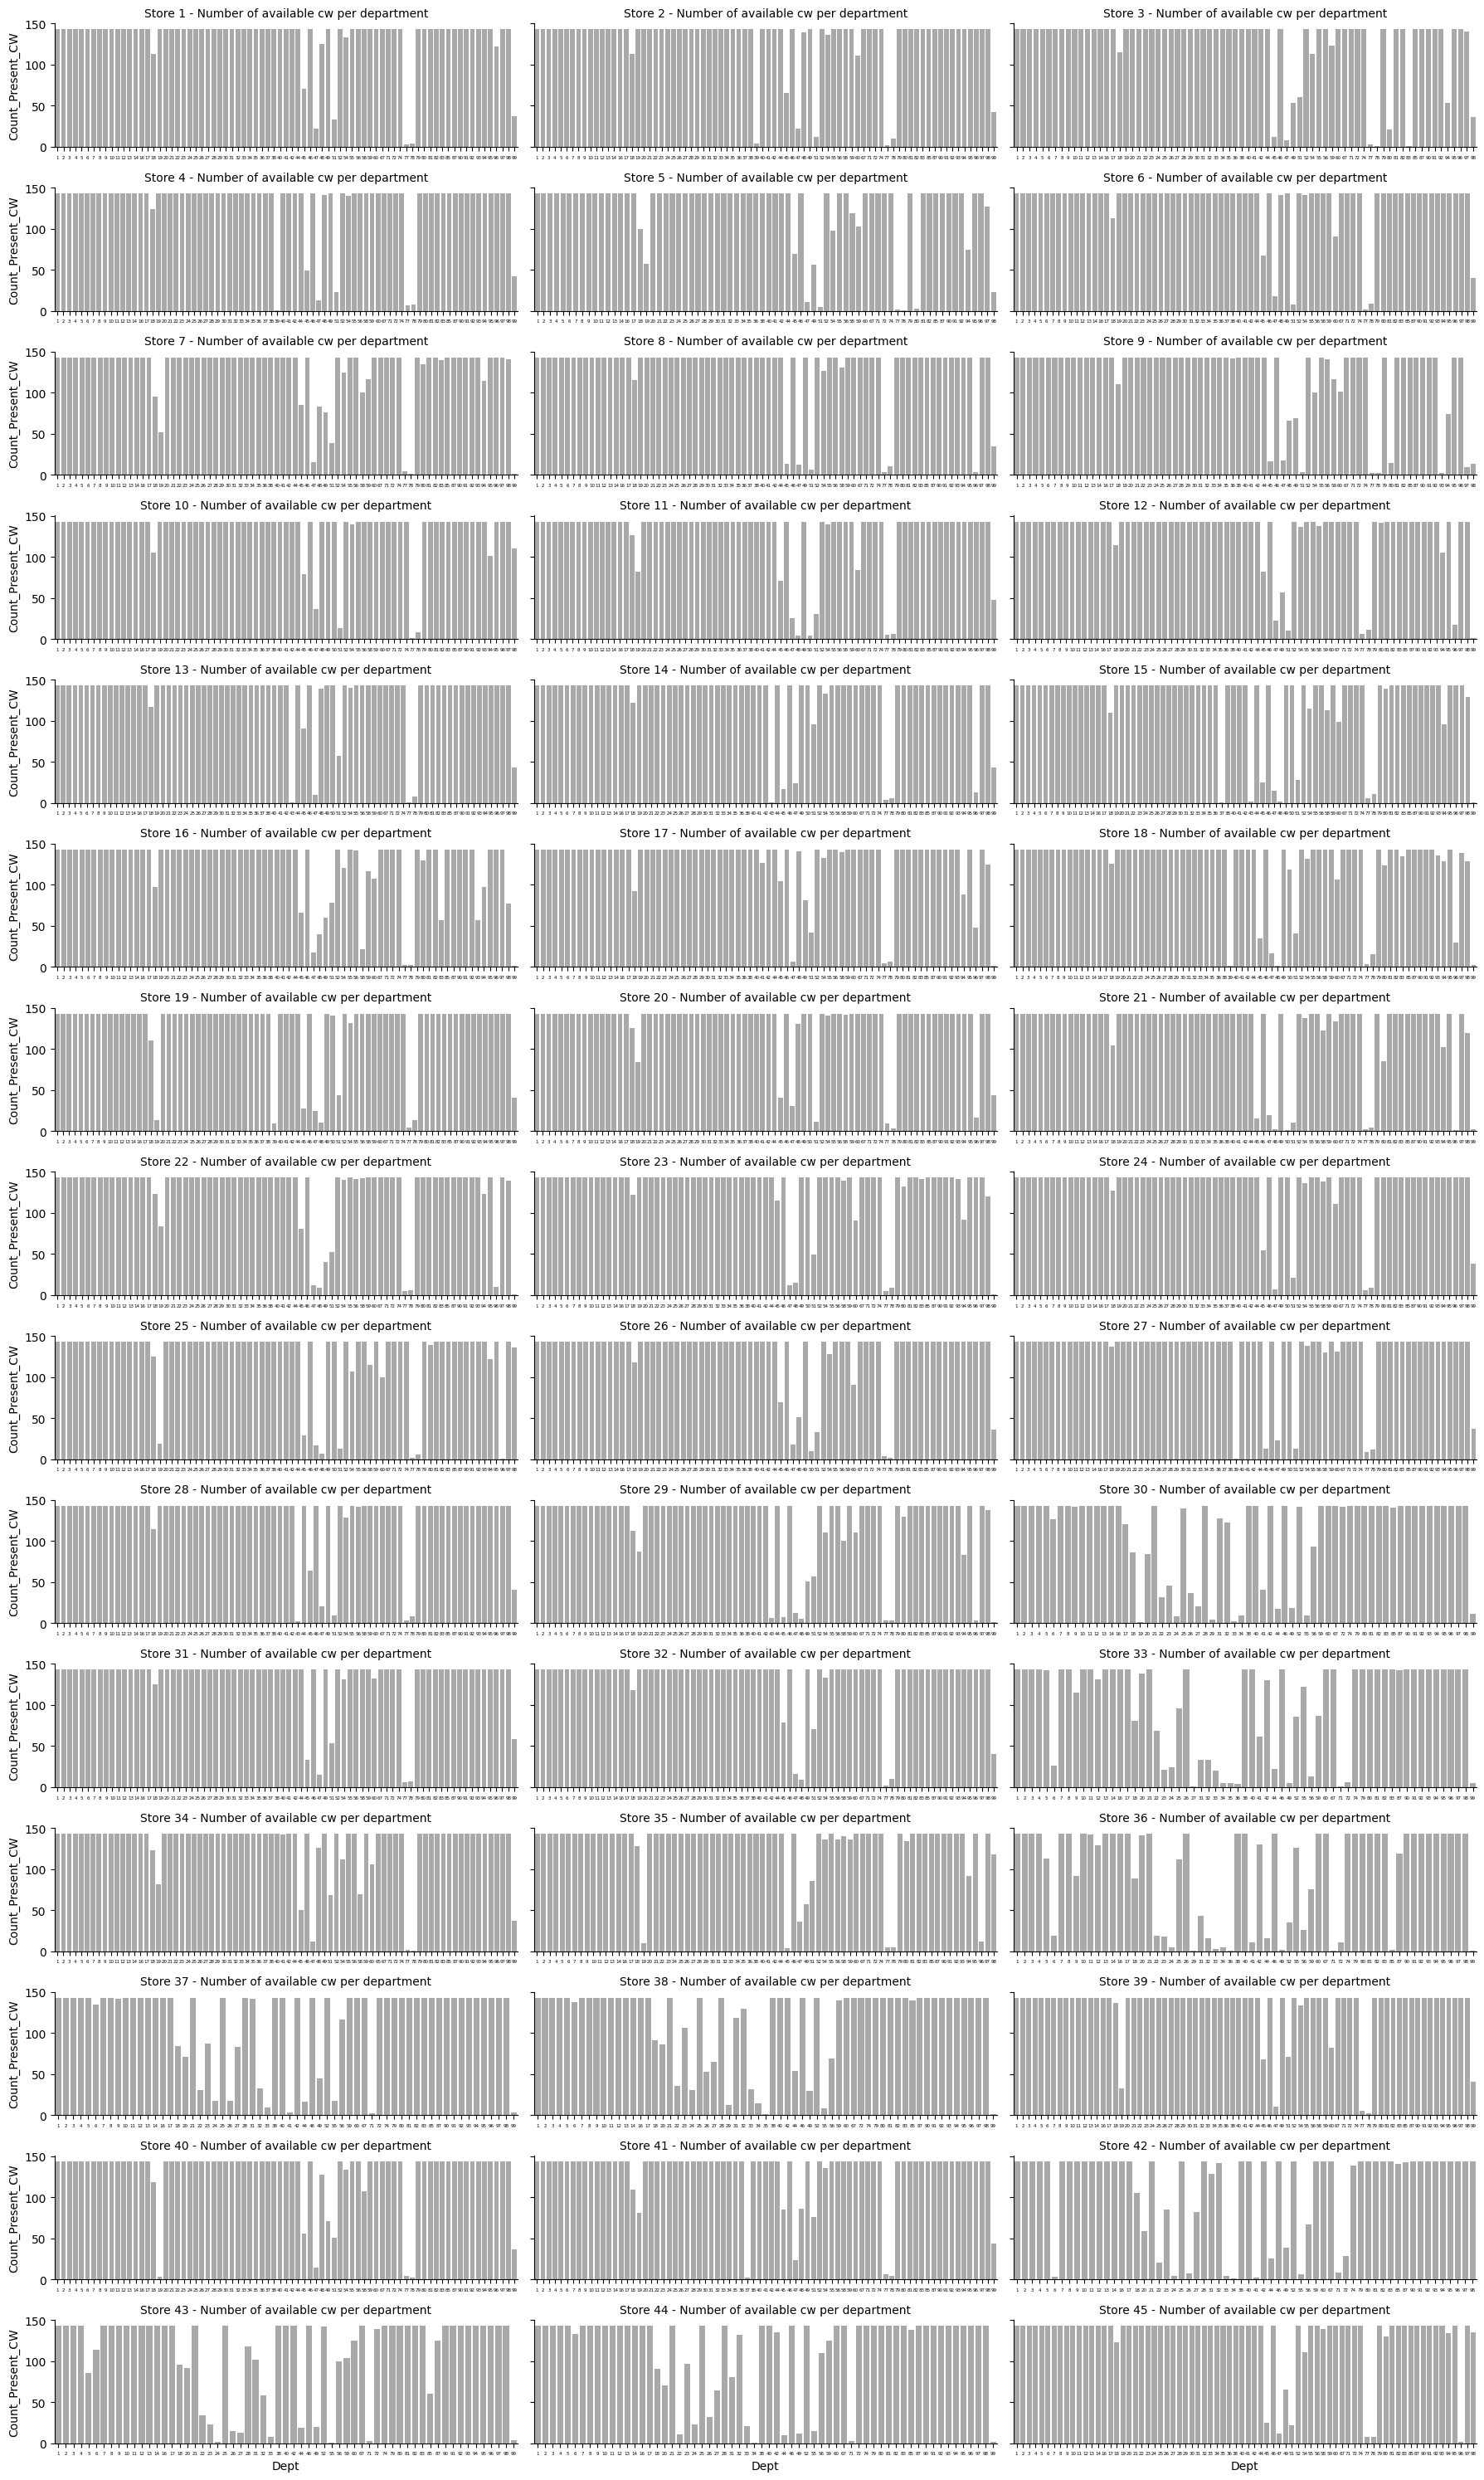

In [82]:
plt.figure(figsize=(12, 24))

colors = ['darkgrey']

g = sns.FacetGrid(grouped_counts_df, col="Store", col_wrap=3, height=2, aspect=3, sharex=False, sharey=True)
g.map(sns.barplot, "Dept", "Count_Present_CW", palette=colors)
g.set_titles("Store {col_name} - Number of available cw per department", fontsize=10)
g.set_xticklabels(fontsize=4, rotation=0)

plt.tight_layout();

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Now a look at the total number of missing observations/calender weeks per store (all departments).</div>

Below is a look at the total number of missing KW per store (all departments).<br> 
The limit for the Y-axis is chosen so large that it can be directly compared with the following plot to see the relation between missing and existing data.

In [83]:
df3 = grouped_counts_df.groupby('Store').Count_Missing_CW.sum().reset_index()

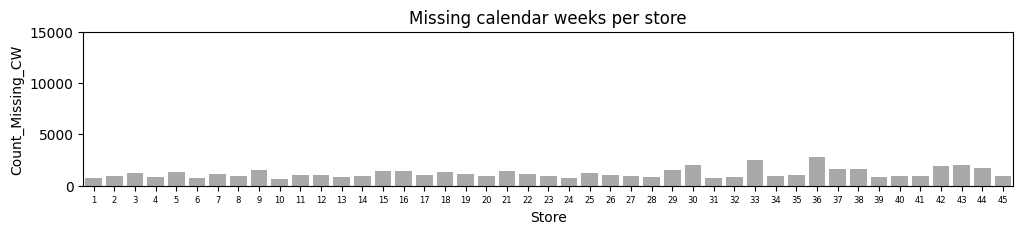

In [84]:
plt.figure(figsize=(12, 2))
colors = ['darkgrey']

ax = sns.barplot(x = df3.Store, 
                y = df3.Count_Missing_CW, 
                palette=colors)

ax.set(ylim=(0, 15000))
ax.set_title('Missing calendar weeks per store')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6);

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Now a look at the total number of available observations per store (all departments).</div>

In [85]:
df4 = grouped_counts_df.groupby('Store').Count_Present_CW.sum().reset_index()

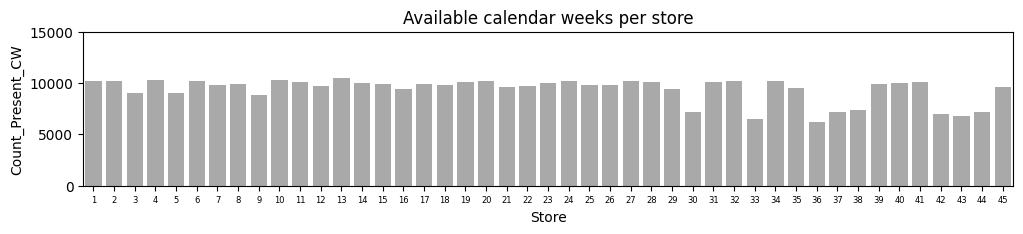

In [86]:
plt.figure(figsize=(12, 2))
colors = ['darkgrey']

ax = sns.barplot(x = df4.Store, 
                y = df4.Count_Present_CW, 
                palette=colors)

ax.set(ylim=(0, 15000))
ax.set_title('Available calendar weeks per store')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6);

In [87]:
df5 = grouped_counts_df.groupby('Dept').Count_Present_CW.sum().reset_index()

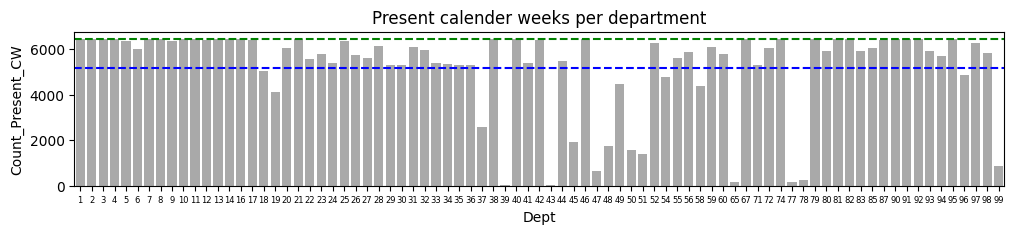

In [88]:
plt.figure(figsize=(12, 2))

colors = ['darkgrey']

ax = sns.barplot(x = df5.Dept, 
                y = df5.Count_Present_CW, 
                palette=colors, 
                ci=None)

ax.axhline(y=(143*45)*0.8, color='blue', linestyle='--', label='Threshold')
ax.axhline(y=143*45, color='g', linestyle='--', label='Threshold')

ax.set_title('Present calender weeks per department')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6);

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Distribution of missing observations</div><br>
How are the missing KW distributed in time? The following is an exemplary look at individual store-department combinations.

In [89]:
abfrage_mis = df.query('Dept == 18 and Store==19')['Calendar_Week']
abfrage_mis = abfrage_mis.to_list()

abfrage_all = df.query('Dept == 4 and Store==19')['Calendar_Week']
abfrage_all = abfrage_all.to_list()

result_list = [1 if x in abfrage_mis else 0 for x in abfrage_all]

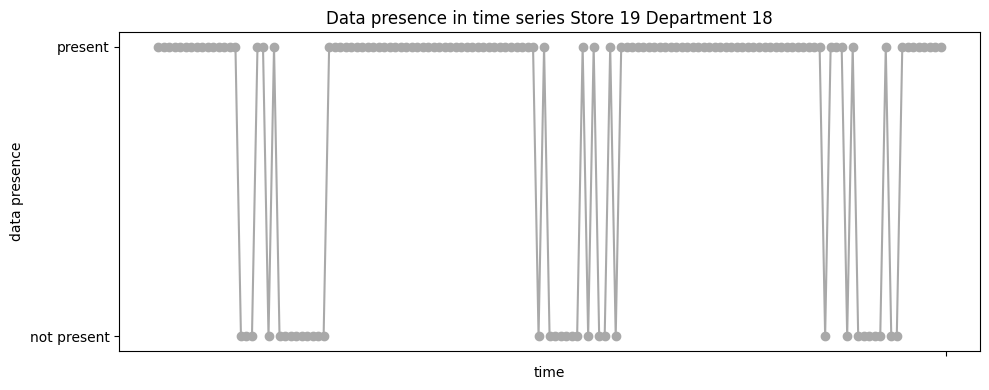

In [90]:
plt.figure(figsize=(10, 4))

plt.plot(abfrage_all, result_list, marker='o', color='darkgrey')

plt.title('Data presence in time series Store 19 Department 18')
plt.xlabel('time')
plt.ylabel('data presence')
plt.xticks('')
plt.yticks([0, 1], ['not present', 'present'])

plt.tight_layout()
plt.show()

In [91]:
abfrage_mis2 = df.query('Dept == 54 and Store==2')['Calendar_Week']
abfrage_mis2 = abfrage_mis2.to_list()

abfrage_all2 = df.query('Dept == 4 and Store==19')['Calendar_Week']
abfrage_all2 = abfrage_all2.to_list()

result_list2 = [1 if x in abfrage_mis2 else 0 for x in abfrage_all2]

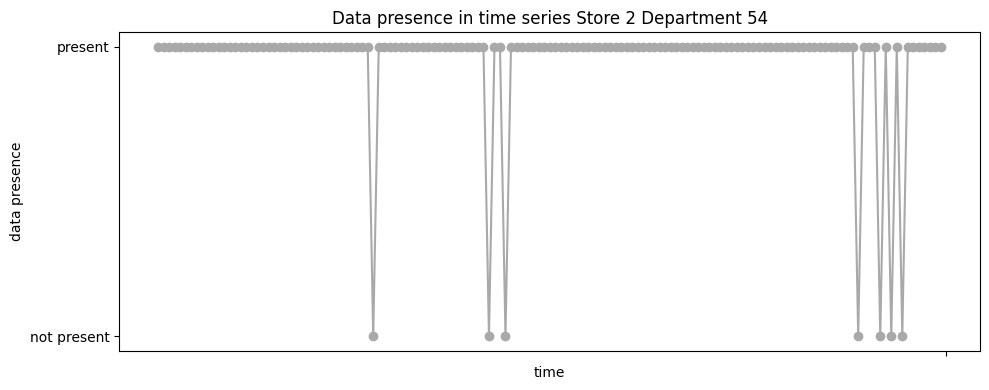

In [92]:
plt.figure(figsize=(10, 4))

plt.plot(abfrage_all2, result_list2, marker='o', color='darkgrey')

plt.title('Data presence in time series Store 2 Department 54')
plt.xlabel('time')
plt.ylabel('data presence')
plt.xticks('')
plt.yticks([0, 1], ['not present', 'present'])

plt.tight_layout()
plt.show()